<h1 align="left"  style=" color:#000; background-color:#FFB6C1; padding:10px;">Flight Delay Prediction </h1>

<h1 align="left"  style=" color:#000; background-color:#90EE90; padding:10px;">Section I: Business Understanding </h1>

**Objective: Predicting a flight delay based on data that is available to passengers**
The domestic aviation industry is riddled with unanticipated flight delays. Minimizing flight delays can enhance the overall travel experience for passengers, leading to increased customer satisfaction, and positively impact an airline's financial performance as it can avoid compensation claims and operational costs associated with delays.

**Questions we are looking to answer through this project:**

If flight delays can be predicted with the information available to a passenger.

If there is some association between duration of flight and flight delays.

If the airline has any impact on the likelihood of a flight delay.

If there is any pattern between day and time of flight, and flight delay.

### Steps Involved 

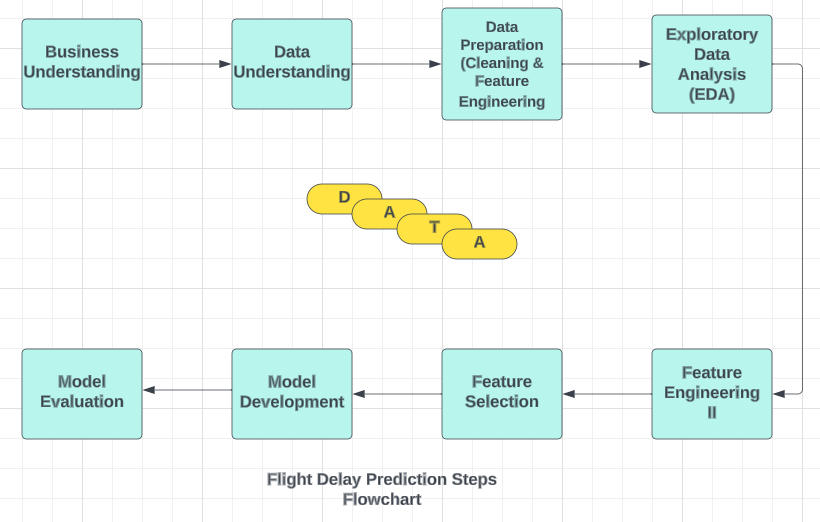

In [3]:
from IPython.display import Image
Image(filename='FDP_Flowchart.png')


<h1 align="left"  style=" color:#000; background-color:#90EE90; padding:10px;">Section II: Data Understanding

Dataset extracted from United States Department of Transportation, Bureau of Transportation Statistics, and the same dataset can be found on Kaggle as well.

Dataset link: https://www.transtats.bts.gov/HomeDrillChart_Month.asp?5ry_lrn4=FDEI&N44_Qry=E&5ry_Pn44vr4=DDD&5ry_Nv42146=DDD&heY_fryrp6lrn4=FDFG&heY_fryrp6Z106u=L

Kaggle Dataset link : https://www.kaggle.com/datasets/usdot/flight-delays?select=flights.csv

## Metadata
<ol>
    <li><strong>YEAR</strong>: Flight data year (e.g., 2015).</li>
    <li><strong>MONTH</strong>: Month of flight data (1-12).</li>
    <li><strong>DAY</strong>: Day of month for flight.</li>
    <li><strong>DAY_OF_WEEK</strong>: Weekday of flight (0-6).</li>
    <li><strong>AIRLINE</strong>: Airline abbreviation (e.g., B6, AS).</li>
    <li><strong>FLIGHT_NUMBER</strong>: Unique flight identification number.</li>
    <li><strong>TAIL_NUMBER</strong>: Aircraft's unique alphanumeric code.</li>
    <li><strong>ORIGIN_AIRPORT</strong>: Departure airport code (e.g., JFK).</li>
    <li><strong>DESTINATION_AIRPORT</strong>: Arrival airport code (e.g., SEA).</li>
    <li><strong>SCHEDULED_DEPARTURE</strong>: Planned flight departure time (HHMM).</li>
    <li><strong>DEPARTURE_TIME</strong>: Actual flight departure time (HHMM).</li>
    <li><strong>DEPARTURE_DELAY</strong>: Minutes delayed in departure.</li>
    <li><strong>TAXI_OUT</strong>: Time from gate departure to takeoff.</li>
    <li><strong>WHEELS_OFF</strong>: Time of takeoff (HHMM).</li>
    <li><strong>SCHEDULED_TIME</strong>: Scheduled flight duration in minutes.</li>
    <li><strong>ELAPSED_TIME</strong>: Actual total flight time in minutes.</li>
    <li><strong>AIR_TIME</strong>: Time spent flying in minutes.</li>
    <li><strong>DISTANCE</strong>: Flight distance in miles.</li>
    <li><strong>WHEELS_ON</strong>: Time of landing (HHMM).</li>
    <li><strong>TAXI_IN</strong>: Time from landing to gate arrival.</li>
    <li><strong>SCHEDULED_ARRIVAL</strong>: Planned arrival time (HHMM).</li>
    <li><strong>ARRIVAL_TIME</strong>: Actual arrival time (HHMM).</li>
    <li><strong>ARRIVAL_DELAY</strong>: Minutes delayed in arrival.</li>
    <li><strong>DIVERTED</strong>: Indicates if flight was diverted (0 or 1).</li>
    <li><strong>CANCELLED</strong>: Indicates if flight was cancelled (0 or 1).</li>
    <li><strong>CANCELLATION_REASON</strong>: Reason for flight cancellation.</li>
    <li><strong>AIR_SYSTEM_DELAY</strong>: Delay due to air system issues in minutes.</li>
    <li><strong>SECURITY_DELAY</strong>: Delay due to security issues in minutes.</li>
    <li><strong>AIRLINE_DELAY</strong>: Delay attributed to airline in minutes.</li>
    <li><strong>LATE_AIRCRAFT_DELAY</strong>: Delay due to late aircraft arrival in minutes.</li>
    <li><strong>WEATHER_DELAY</strong>: Weather-related delay in minutes.</li>
    <li><strong>AIRLINE_NAME</strong>: Full name of the airline.</li>
    <li><strong>AIRPORT_NAME</strong>: Full name of the airport.</li>
    <li><strong>FLIGHT_DELAY_CATEGORY</strong>: Classification of flight delay severity.</li>
    <li><strong>FLIGHT_DELAY</strong>: Total flight delay status (YES/NO).</li>
    <li><strong>DAY_OF_WEEK_NAME</strong>: Full name of the day of the week.</li>
    <li><strong>Time_Period</strong>: Time category for scheduled departure.</li>
    <li><strong>ORIGIN_LATITUDE</strong>: Latitude of origin airport.</li>
    <li><strong>ORIGIN_LONGITUDE</strong>: Longitude of origin airport.</li>
    <li><strong>DESTINATION_LATITUDE</strong>: Latitude of destination airport.</li>
    <li><strong>DESTINATION_LONGITUDE</strong>: Longitude of destination airport.</li>
    <li><strong>ORIGIN_CITY</strong>: City of origin airport.</li>
    <li><strong>ORIGIN_STATE</strong>: State of origin airport.</li>
    <li><strong>DESTINATION_CITY</strong>: City of destination airport.</li>
    <li><strong>DESTINATION_STATE</strong>: State of destination airport.</li>
</ol>


### Importing all the necessary libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import seaborn as sns
import xgboost as xgb
import scipy
import joblib
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import plotly.graph_objs as go
import dash_bootstrap_components as dbc
from datetime import datetime as dt  
from matplotlib.gridspec import GridSpec
from sklearn.utils import resample
from statistics import median, mode
from scipy.stats import kurtosis
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, SelectFromModel, RFE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    cohen_kappa_score, log_loss, roc_auc_score, confusion_matrix, classification_report
)

C:\Users\parva\AppData\Local\Temp\ipykernel_25244\2325698601.py:11: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\parva\AppData\Local\Temp\ipykernel_25244\2325698601.py:12: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
C:\Users\parva\AppData\Roaming\Python\Python311\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


### Loading the csv file dataset into the program
**In this dataset, we have 3 input files and 1 file built from scratch using the data avaialble on the US Dept of Transportation website to fill up the missing and wrongly named Origin and Destination Aiport codes **

1. Flights_data.csv: Contains the lookup tablr 5.81 million records # Total of 31 features
2. Airlines.csv: Contains table with IATA Code for 14 Airline names # Total of 2 features
3. Airports.csv: Contains table with IATA Code details of 322 airport names and it's location that includes city, state, country latitude, and longitude # Total of 7 features
4. Airportcodesf.csv : Contains table with correct codes for origin and distination aiport along with their description. # Total of 3 features

In [7]:
# Lading dataset from csv file and printing their shape
dfAirlines = pd.read_csv(r'C:\Users\arjun\OneDrive\Desktop\2023 Sept Fall 3rd sem\Predictive Analytics\dataset\airlines.csv')
dfAirports = pd.read_csv(r'C:\Users\arjun\OneDrive\Desktop\2023 Sept Fall 3rd sem\Predictive Analytics\dataset\airports.csv')

In [8]:
dfoutputf = pd.read_csv(r'C:\Users\arjun\OneDrive\Desktop\2023 Sept Fall 3rd sem\Predictive Analytics\dataset\flights_data.csv', low_memory=False)
merged_data =  pd.read_csv(r'C:\Users\arjun\OneDrive\Desktop\2023 Sept Fall 3rd sem\Predictive Analytics\dataset/airportcodef.csv')

In [9]:
# Printing the shape of all 4 csv files
dfoutputf.shape, dfAirlines.shape,  dfAirports.shape, merged_data.shape

((5819079, 31), (14, 2), (322, 7), (6692, 3))

In [10]:
# Showing first 4 sample of flight dataset
dfoutputf.head(4)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Showing first 4 sample of the airlines dataset
dfAirlines.head(4)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.


In [12]:
# Showing first 4 sample of airport dataset
dfAirports.head(4)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183


In [13]:
# Showing first 4 sample of mapped data from web
merged_data.head(4)

,Code_x,Description,Code_y
0,01A,"Afognak Lake, AK: Afognak Lake Airport",10001
1,03A,"Granite Mountain, AK: Bear Creek Mining Strip",10003
2,04A,"Lik, AK: Lik Mining Camp",10004
3,05A,"Little Squaw, AK: Little Squaw Airport",10005


In [8]:
dfoutputf.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object



<h1 align="left"  style=" color:#000; background-color:#90EE90; padding:10px;">Section III: Data Preparation (Preprocessing, Cleaning and Feature Engineering)

In [9]:
dfoutputf.describe() # We used describe() function in Pandas to get summary statistics of the numeric columns in the DataFram

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


### Dropping duplicates rows

In [10]:
dfoutputf.drop_duplicates() # removes duplicate rows, keeping only the first occurrence of each unique row based on all columns.

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
dfAirports.drop_duplicates()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [12]:
dfAirlines.drop_duplicates()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


### Fixing inconsistency in Origin and Destination Airport codes and fixing them

In [13]:
# Identifing rows with 5-digit origin airports
five_digit_origin_airports = dfoutputf[dfoutputf['ORIGIN_AIRPORT'].str.len() == 5]
print(f"\nNumber of rows with 5-digit Origin Airports: {len(five_digit_origin_airports)}")

# Identifing rows with 5-digit destination airports
five_digit_destination_airports = dfoutputf[dfoutputf['DESTINATION_AIRPORT'].str.len() == 5]
print(f"Number of rows with 5-digit Destination Airports: {len(five_digit_destination_airports)}")



Number of rows with 5-digit Origin Airports: 486165
Number of rows with 5-digit Destination Airports: 486165


### Usin 'airportcodesf' file stored in dataframe 'merged_data' to fix Airport codes

In [15]:
# Converting 'Code_y' to string
merged_data['Code_y'] = merged_data['Code_y'].astype(str)

# mapping dictionary 
code_y_to_x = merged_data.set_index('Code_y')['Code_x'].to_dict()

def map_and_convert(value, mapping_dict):
    return mapping_dict.get(str(value), value)

dfoutputf['ORIGIN_AIRPORT'] = dfoutputf['ORIGIN_AIRPORT'].apply(map_and_convert, mapping_dict=code_y_to_x)
dfoutputf['DESTINATION_AIRPORT'] = dfoutputf['DESTINATION_AIRPORT'].apply(map_and_convert, mapping_dict=code_y_to_x)


In [16]:
# Identifing rows with 5-digit origin airports to make sure there are no 5 digit Origin Airport codes anymore
five_digit_origin_airports = dfoutputf[dfoutputf['ORIGIN_AIRPORT'].str.len() == 5]
print(f"\nNumber of rows with 5-digit Origin Airports: {len(five_digit_origin_airports)}")

# Identifing rows with 5-digit destination airports to make sure there are no 5 digit Origin Airport codes anymore
five_digit_destination_airports = dfoutputf[dfoutputf['DESTINATION_AIRPORT'].str.len() == 5]
print(f"Number of rows with 5-digit Destination Airports: {len(five_digit_destination_airports)}")


Number of rows with 5-digit Origin Airports: 0
Number of rows with 5-digit Destination Airports: 0


### Fixing the missing values in the 12 rows

In [17]:
# Calculating missing values count and percentage before replacing
missing_counts_before = dfoutputf.isnull().sum()
total_rows = len(dfoutputf)
missing_percentages_before = (missing_counts_before / total_rows) * 100
missing_info_before = pd.DataFrame({'Missing Count (Before)': missing_counts_before, 'Missing % (Before)': missing_percentages_before})
print("Missing Values Count and Percentage (Before Replace):")
print(missing_info_before)

Missing Values Count and Percentage (Before Replace):
                     Missing Count (Before)  Missing % (Before)
YEAR                                      0            0.000000
MONTH                                     0            0.000000
DAY                                       0            0.000000
DAY_OF_WEEK                               0            0.000000
AIRLINE                                   0            0.000000
FLIGHT_NUMBER                             0            0.000000
TAIL_NUMBER                           14721            0.252978
ORIGIN_AIRPORT                            0            0.000000
DESTINATION_AIRPORT                       0            0.000000
SCHEDULED_DEPARTURE                       0            0.000000
DEPARTURE_TIME                        86153            1.480526
DEPARTURE_DELAY                       86153            1.480526
TAXI_OUT                              89047            1.530259
WHEELS_OFF                            89047       

<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : It can be observed that percentage of missing values is negligible for most columns. The column Cancellation Reason has high percentage of missing values because it is empty for non-cancelled flights. Similarly, the four columns below it are concerned with the reason for flight delay and have a high value for missing data, since such data might not be available for a lot of (delayed) flights. </h1>

In [18]:
# These columns a lot have missing values and and might be good predictors but were dropped because they are inconsistent with the solution. 
# The premise of this project is to predict flight delay with the information that is available to passengers, 
# and they would not have information regarding these columns.
columns_to_drop = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY','SECURITY_DELAY', 'AIRLINE_DELAY', 
                   'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
dfoutputf = dfoutputf.drop(columns=columns_to_drop)

In [20]:
# Dropping rows with missing values
dfoutputf.dropna(inplace=True)

# Calculating missing values count and percentage after replacing
missing_counts_after = dfoutputf.isnull().sum()
missing_percentages_after = (missing_counts_after / total_rows) * 100
missing_info_after = pd.DataFrame({'Missing Count (After Replace)': missing_counts_after, 'Missing % (After Replace)': missing_percentages_after})

In [21]:
# Calculating missing values count and percentage after replacing
missing_counts_before = dfoutputf.isnull().sum()
total_rows = len(dfoutputf)
missing_percentages_before = (missing_counts_before / total_rows) * 100
missing_info_before = pd.DataFrame({'Missing Count (Before)': missing_counts_before, 'Missing % (Before)': missing_percentages_before})
print("Missing Values Count and Percentage (Before Replace):")
print(missing_info_before)

Missing Values Count and Percentage (Before Replace):
                     Missing Count (Before)  Missing % (Before)
YEAR                                      0                 0.0
MONTH                                     0                 0.0
DAY                                       0                 0.0
DAY_OF_WEEK                               0                 0.0
AIRLINE                                   0                 0.0
FLIGHT_NUMBER                             0                 0.0
TAIL_NUMBER                               0                 0.0
ORIGIN_AIRPORT                            0                 0.0
DESTINATION_AIRPORT                       0                 0.0
SCHEDULED_DEPARTURE                       0                 0.0
DEPARTURE_TIME                            0                 0.0
DEPARTURE_DELAY                           0                 0.0
TAXI_OUT                                  0                 0.0
WHEELS_OFF                                0       

In [22]:
# Correcting the datatypes of certain columns and converting them to integer datatype
dfoutputf['DEPARTURE_TIME'] = dfoutputf['DEPARTURE_TIME'].astype(int)
dfoutputf['WHEELS_OFF'] = dfoutputf['WHEELS_OFF'].astype(int)
dfoutputf['WHEELS_ON'] = dfoutputf['WHEELS_ON'].astype(int)
dfoutputf['ARRIVAL_TIME'] = dfoutputf['ARRIVAL_TIME'].astype(int)

In [23]:
#Creating a Dictonary from our dataset to get the Airline Names
airline_dict = dfAirlines.set_index('IATA_CODE')['AIRLINE'].to_dict()

dfoutputf["AIRLINE_NAME"]=dfoutputf['AIRLINE'].map(airline_dict)
dfoutputf.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIRLINE_NAME
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,169.0,1448,404,4.0,430,408,-22.0,0,0,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,263.0,2330,737,4.0,750,741,-9.0,0,0,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,266.0,2296,800,11.0,806,811,5.0,0,0,US Airways Inc.


In [24]:
dfoutputf = dfoutputf.drop(columns=['AIRLINE'])

In [25]:
dfoutputf.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'AIRLINE_NAME'],
      dtype='object')

### Mapping Features from the Airline and Airport dataset to our main dataset

In [26]:
# Creating a dictionary to map IATA_CODE to CITY, STATE, LATITUDE, and LONGITUDE
airport_mapping = dfAirports[['IATA_CODE', 'CITY', 'STATE', 'LATITUDE', 'LONGITUDE']].set_index('IATA_CODE').to_dict(orient='index')

# Mapping 'ORIGIN_AIRPORT' and 'DESTINATION_AIRPORT' to create four new columns 'ORIGIN_CITY' 'ORIGIN_STATE' 'DESTINATION_CITY' 'DESTINATION_STATE'
dfoutputf['ORIGIN_CITY'] = dfoutputf['ORIGIN_AIRPORT'].map(lambda x: airport_mapping.get(x, {}).get('CITY'))
dfoutputf['ORIGIN_STATE'] = dfoutputf['ORIGIN_AIRPORT'].map(lambda x: airport_mapping.get(x, {}).get('STATE'))
dfoutputf['DESTINATION_CITY'] = dfoutputf['DESTINATION_AIRPORT'].map(lambda x: airport_mapping.get(x, {}).get('CITY'))
dfoutputf['DESTINATION_STATE'] = dfoutputf['DESTINATION_AIRPORT'].map(lambda x: airport_mapping.get(x, {}).get('STATE'))

# Mapping 'ORIGIN_AIRPORT' and 'DESTINATION_AIRPORT' to create four new columns ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE', 'DESTINATION_LATITUDE', 'DESTINATION_LONGITUDE'
dfoutputf['ORIGIN_LATITUDE'] = dfoutputf['ORIGIN_AIRPORT'].map(lambda x: airport_mapping.get(x, {}).get('LATITUDE'))
dfoutputf['ORIGIN_LONGITUDE'] = dfoutputf['ORIGIN_AIRPORT'].map(lambda x: airport_mapping.get(x, {}).get('LONGITUDE'))
dfoutputf['DESTINATION_LATITUDE'] = dfoutputf['DESTINATION_AIRPORT'].map(lambda x: airport_mapping.get(x, {}).get('LATITUDE'))
dfoutputf['DESTINATION_LONGITUDE'] = dfoutputf['DESTINATION_AIRPORT'].map(lambda x: airport_mapping.get(x, {}).get('LONGITUDE'))

In [27]:
dfoutputf.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'AIRLINE_NAME', 'ORIGIN_CITY', 'ORIGIN_STATE',
       'DESTINATION_CITY', 'DESTINATION_STATE', 'ORIGIN_LATITUDE',
       'ORIGIN_LONGITUDE', 'DESTINATION_LATITUDE', 'DESTINATION_LONGITUDE'],
      dtype='object')

In [28]:
dfoutputf.shape

(5714008, 33)

### Removing rows with cancelled flights data

In [29]:
# As cancelled column has 2 category in output '0' and '1' where 0 means the flights were not cancelled and 1 means the flights were cancelled. 
# In this project, we are just dealing with the delayed flights not with cancelled flights.
dfoutputf.drop(dfoutputf[dfoutputf['CANCELLED'] == 1].index, inplace=True) 

In [30]:
dfoutputf.shape

(5714008, 33)

In [31]:
# Adding a new column 'FLIGHT_DELAY_CATEGORY' to dfoutputf dataframe
dfoutputf['FLIGHT_DELAY_CATEGORY'] = dfoutputf['ARRIVAL_DELAY']

In [32]:
# Converting the 'TAIL_NUMBER' and 'FLIGHT_NUMBER' columns in the DataFrame dfoutputf to string data type
dfoutputf['TAIL_NUMBER'] = dfoutputf['TAIL_NUMBER'].astype(str)
dfoutputf['FLIGHT_NUMBER'] = dfoutputf['FLIGHT_NUMBER'].astype(str)  

### Handling Datetime Values

In [33]:
# We used a function to convert integers to HH:MM format for the below 5 columns
def int_to_hhmm(value):
    if pd.notna(value):
        value_str = str(value).zfill(4)  # Ensure it has 4 digits
        return f"{value_str[:2]}:{value_str[2:]}"
    else:
        return None

# Specifying the columns to convert
columns_to_convert = ['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME']

# Applying the conversion function to the specified columns
dfoutputf[columns_to_convert] = dfoutputf[columns_to_convert].applymap(int_to_hhmm)

<h1 align="left"  style=" color:#000; background-color:#90EE90; padding:10px;">Section IV: Exploratory Data Analysis

### Exploring Arrival Delay Counts just to understand how many percentage of flights were delayed in total

In [34]:
# We then counted number of sample per class to understanding the nature of data
dfoutputf['FLIGHT_DELAY'] = dfoutputf['ARRIVAL_DELAY'].map( lambda x : 'YES' if x>0 else 'NO')
sample_per_class=dfoutputf['FLIGHT_DELAY'].groupby(dfoutputf['FLIGHT_DELAY']).count()
sample_per_class

FLIGHT_DELAY
NO     3627112
YES    2086896
Name: FLIGHT_DELAY, dtype: int64

In [35]:
# We created new dataset only for delayed flights named as 'flight delay'
delay_flights=dfoutputf[dfoutputf['FLIGHT_DELAY']=='YES']
print("Total flights: {}". format(dfoutputf.shape[0]))
print("Total delay flights: {}". format(delay_flights.shape[0]))
print("Percentage of flights delay {}".format((delay_flights.shape[0]/dfoutputf.shape[0])*100))

Total flights: 5714008
Total delay flights: 2086896
Percentage of flights delay 36.52245499131258


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation: We found that 36.52% of total flights were delayed and 63.48% of the flights were not delayed. </h1>

### Classifying 'Flight Delay Category' into 3 classes based on 'Arrival Delay' attribute

In [36]:
def classify_delay_time(delay):
    if delay <= 0:
        return 0  # 'On Time'
    elif 0 < delay <= 15:
        return 1  # 'Minor Delay'
    else:
        return 2  # ' Major Delay'

dfoutputf['FLIGHT_DELAY_CATEGORY'] = dfoutputf['ARRIVAL_DELAY'].apply(classify_delay_time)

In [37]:
dfoutputf['FLIGHT_DELAY_CATEGORY'].value_counts()

0    3627112
1    1063398
2    1023498
Name: FLIGHT_DELAY_CATEGORY, dtype: int64

### Observing the distribution of the Target Variable using Bar Chart

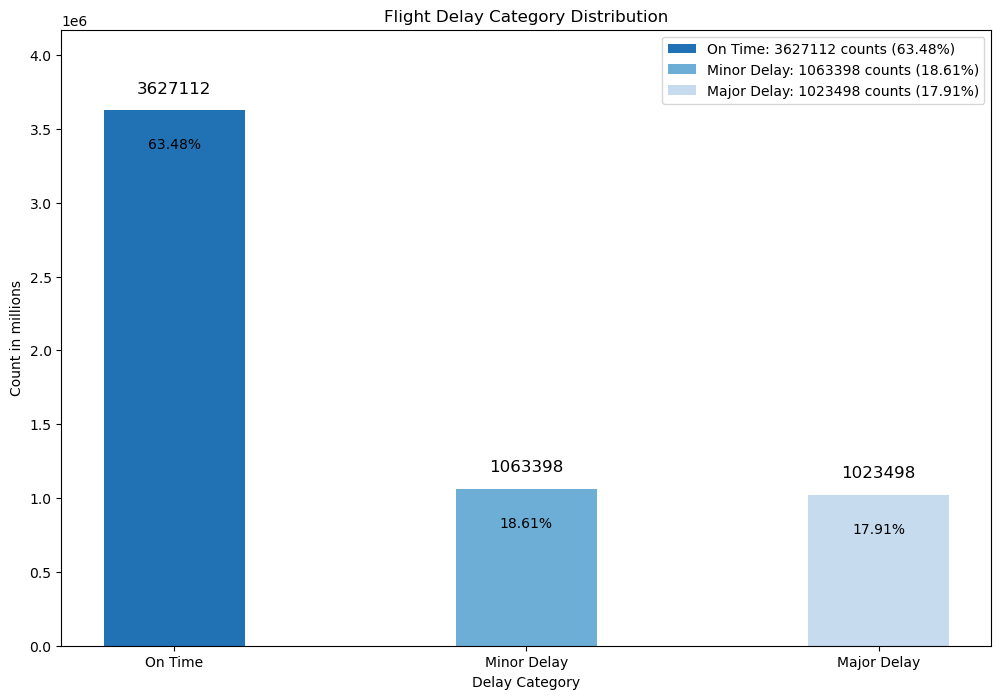

In [38]:
class_labels = {
    0: 'On Time',
    1: 'Minor Delay',
    2: 'Major Delay'
}

class_counts = dfoutputf['FLIGHT_DELAY_CATEGORY'].value_counts()

# Sorting the class counts
sorted_class_counts = class_counts.loc[class_labels.keys()]

colors = sns.color_palette("Blues_r", n_colors=len(class_labels))
legend_labels = [f'{label}: {count} counts ({count/len(dfoutputf)*100:.2f}%)' for label, count in zip(class_labels.values(), sorted_class_counts)]

# Creating the bar chart 
plt.figure(figsize=(12, 8))  
bar_width = 0.4  
bars = plt.bar(class_labels.values(), sorted_class_counts, color=colors, width=bar_width)
plt.xlabel('Delay Category')
plt.ylabel('Count in millions')
plt.title('Flight Delay Category Distribution')
plt.ylim(0, max(sorted_class_counts) * 1.15) 

# Adding labels for percentage and value counts
for bar in bars:
    height = bar.get_height()
    percentage = height / len(dfoutputf) * 100
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), 
                 xytext=(0, 10), textcoords="offset points", ha='center', va='bottom', 
                 fontsize=12)  
    plt.annotate(f'{percentage:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), 
                 xytext=(0, -20), textcoords="offset points", ha='center', va='top', 
                 fontsize=10)  

plt.grid(False)
plt.legend(bars, legend_labels, loc='upper right')

plt.show()


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : It is evident that target variable category distribution is unbalanced. Category 0 (On Time) occurrences are almost 3 times more than Category 1 (Minor Delay) and Category 2 (Major Delay) occurences. </h1>

## Exploring Delays by Time of Day
### Binning Time of Day to understand Flight Delay Distribution across the day

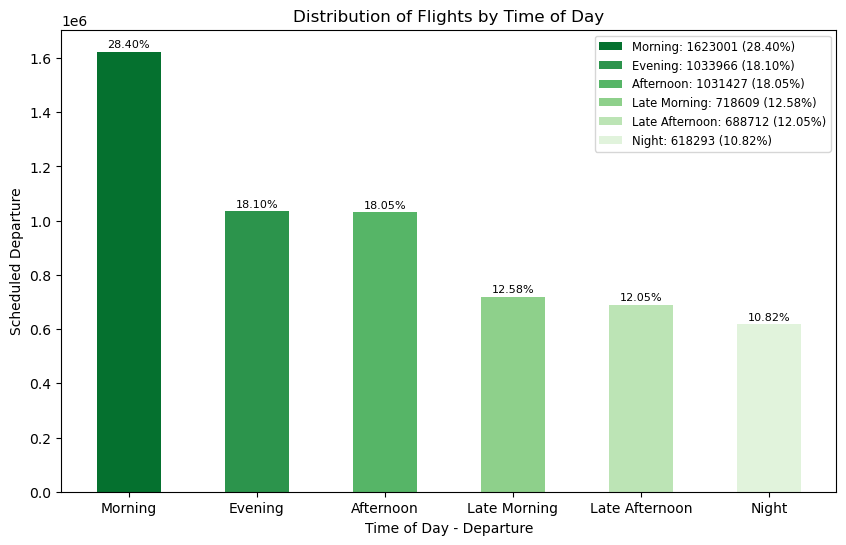

In [39]:
def bin_time_period(time_str):
    # Converting the time string to hours and minutes
    hours, minutes = map(int, time_str.split(':'))

    # time period bins
    if 5 <= hours < 10:
        return 'Morning'
    elif 10 <= hours < 12:
        return 'Late Morning'
    elif 12 <= hours < 15:
        return 'Afternoon'
    elif 15 <= hours < 17:
        return 'Late Afternoon'
    elif 17 <= hours < 20:
        return 'Evening'
    else:
        return 'Night'

# Creating a new column 'Time_Period'
dfoutputf['Time_Period'] = dfoutputf['SCHEDULED_DEPARTURE'].apply(bin_time_period)

colors = sns.color_palette("Greens", n_colors=6)[::-1]

# Creating a bar plot
plt.figure(figsize=(10, 6))
data = dfoutputf['Time_Period'].value_counts()
total_count = data.sum()
percentage = [(count / total_count) * 100 for count in data]

bars = plt.bar(data.index, data, color=colors, width=0.5)


for bar, percent in zip(bars, percentage):
    height = bar.get_height()
    plt.annotate(f'{percent:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', fontsize=8)

legend_labels = [f'{index}: {count} ({percent:.2f}%)' for index, count, percent in zip(data.index, data, percentage)]
plt.legend(bars, legend_labels, loc='upper right', fontsize='small')

plt.xlabel('Time of Day - Departure')
plt.ylabel('Scheduled Departure')
plt.title('Distribution of Flights by Time of Day')
plt.grid(False)
plt.show()

### Percentage of Flight Delays by Time of Day

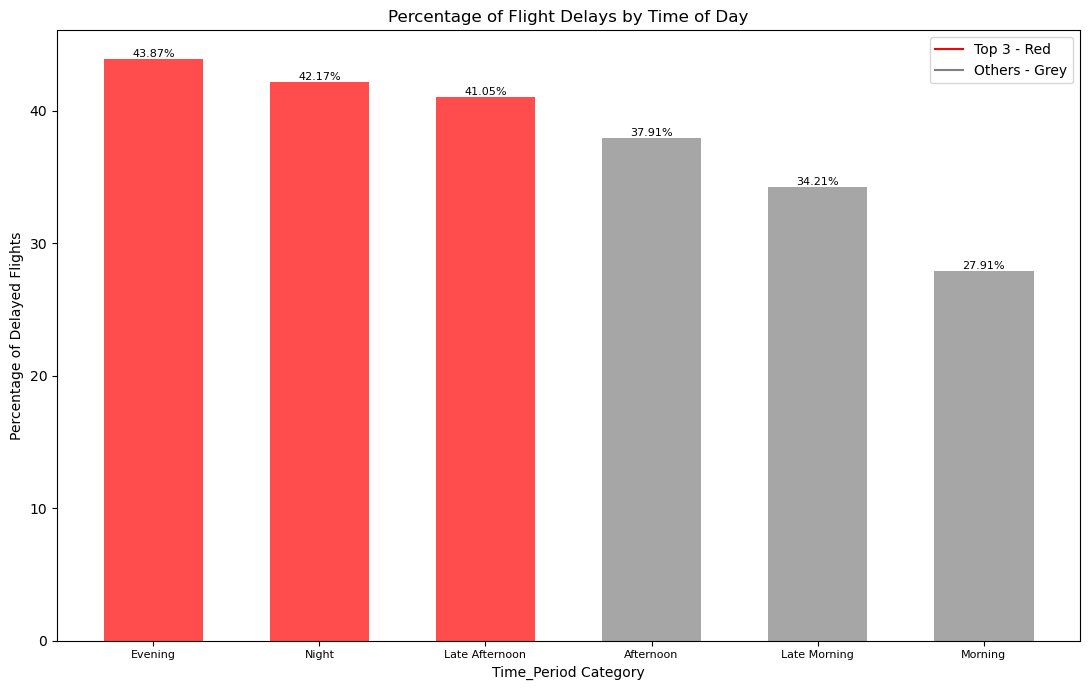

In [40]:
delay_flights=dfoutputf[dfoutputf['FLIGHT_DELAY']=='YES']

time_categories = dfoutputf['Time_Period'].unique()
percentage_delays = []

for category in time_categories:
    total_flights = dfoutputf[dfoutputf['Time_Period'] == category].shape[0]
    delayed_flights = delay_flights[delay_flights['Time_Period'] == category].shape[0]
    percentage = (delayed_flights / total_flights) * 100
    percentage_delays.append(percentage)

# Sorting the percentagr delays in descending order
sorted_categories = [x for _, x in sorted(zip(percentage_delays, time_categories), reverse=True)]
sorted_percentage_delays = sorted(percentage_delays, reverse=True)

top_3_categories = sorted_categories[:3]

# Creating a vertical bar chart
plt.figure(figsize=(11, 7))
index = range(len(sorted_categories))
bar_width = 0.6
colors = ['grey' if category not in top_3_categories else 'red' for category in sorted_categories]
plt.bar(index, sorted_percentage_delays, color=colors, alpha=0.7, width=bar_width)

plt.xlabel('Time_Period Category')
plt.ylabel('Percentage of Delayed Flights')
plt.title('Percentage of Flight Delays by Time of Day')

plt.xticks(index, sorted_categories, fontsize=8)

# Annotating
for i in range(len(index)):
    plt.text(index[i], sorted_percentage_delays[i], f'{sorted_percentage_delays[i]:.2f}%', ha='center', va='bottom', fontsize=8)

percentage_legend = plt.Line2D([0], [0], color='red', label='Top 3 - Red')
grey_legend = plt.Line2D([0], [0], color='grey', label='Others - Grey')
plt.legend(handles=[percentage_legend, grey_legend], loc='upper right')

plt.tight_layout()
plt.show()


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : From the two preceding graphs, it can be noticed that though most flights are scheduled to depart in the morning, it is the flights in the later half of the day that are more likely to get delayed.  </h1>

## Exploring Delays by Day of the Week

/var/folders/ls/g6jwv3vd36l6mw_t9n4tgj2c0000gn/T/ipykernel_27114/2168408493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_flights['DAY_OF_WEEK_NAME'] = delay_flights['DAY_OF_WEEK'].map(days_arr)


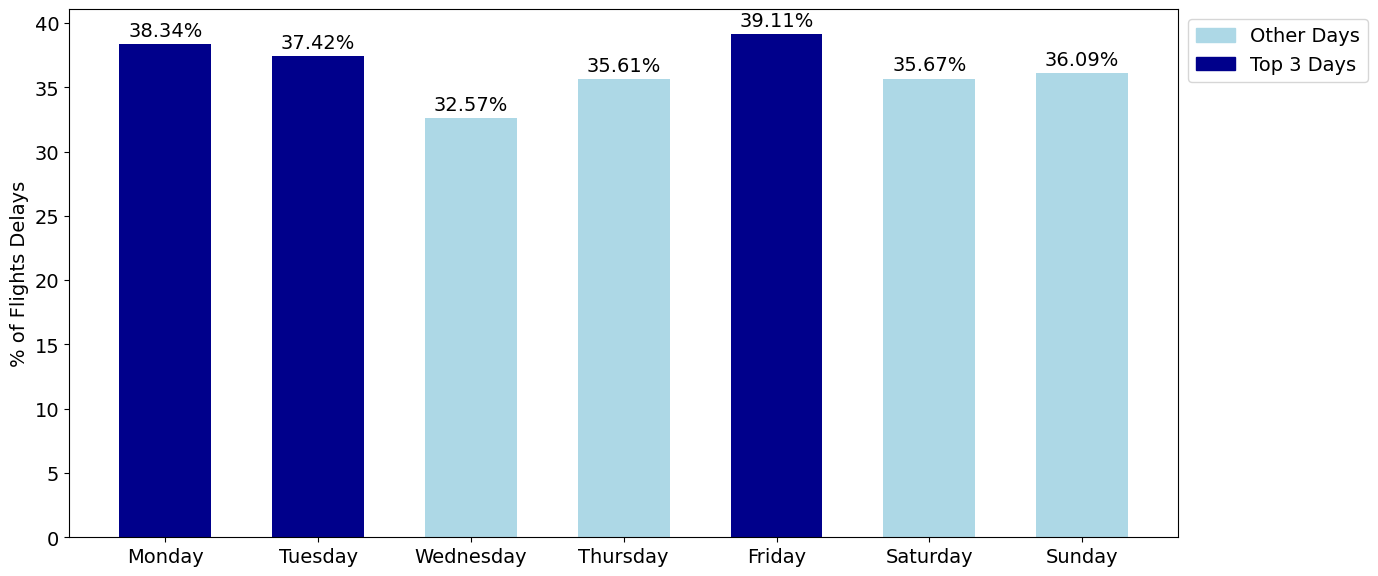

In [43]:
# Mapping Day of the week column for bar chart visualization
days_arr = {1: 'MONDAY', 2: 'TUESDAY', 3: 'WEDNESDAY', 4: 'THURSDAY', 5: 'FRIDAY', 6: 'SATURDAY', 7: 'SUNDAY'}
dfoutputf['DAY_OF_WEEK_NAME'] = dfoutputf['DAY_OF_WEEK'].map(days_arr)
delay_flights['DAY_OF_WEEK_NAME'] = delay_flights['DAY_OF_WEEK'].map(days_arr)

font = {'size': 14}
plt.rc('font', **font)

days_delays = delay_flights['FLIGHT_DELAY'].groupby(delay_flights['DAY_OF_WEEK_NAME']).count()
days_totals = dfoutputf['FLIGHT_DELAY'].groupby(dfoutputf['DAY_OF_WEEK_NAME']).count()
days_frac = (days_delays / days_totals) * 100

week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

x = [day for day in week]
fig, ax = plt.subplots(figsize=(14, 6))  # Increased width

bar_width = 0.6
colors = ['lightblue'] * 7
top_3_days = ['Friday', 'Monday', 'Tuesday']

for i, day in enumerate(x):
    if day in top_3_days:
        colors[i] = 'darkblue'

bars = ax.bar(x, days_frac, color=colors, width=bar_width)

for bar, percentage in zip(bars, days_frac):
    ax.annotate(f'{percentage:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), 
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_ylabel('% of Flights Delays')
ax.set_xticks(x)
ax.set_xticklabels(x)

legend_labels = ['Other Days', 'Top 3 Days']
legend_handles = [mpatches.Patch(color='lightblue', label='Other Days'),
                  mpatches.Patch(color='darkblue', label='Top 3 Days')]

ax.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1), fontsize='medium')

plt.tight_layout()
plt.show()


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : It can be seen that flight delays are somewhat consistent across all days of the week, but a large proportion of flights flying on Monday and Friday get delayed.  </h1>

## Exploring Arrival Delay by Airlines

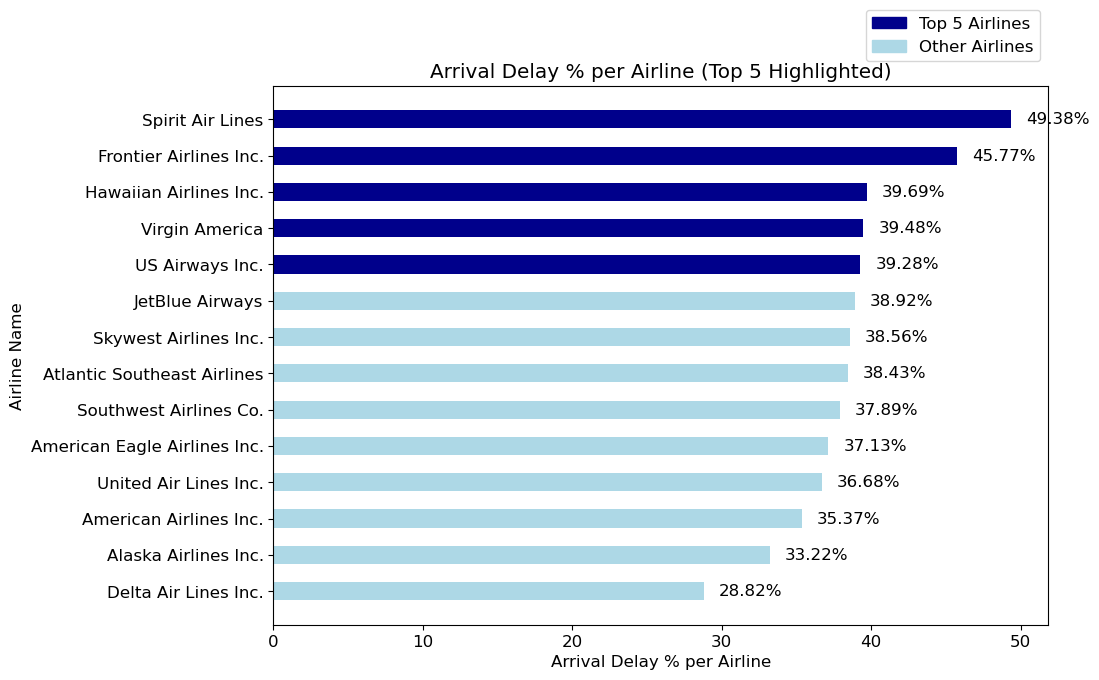

In [167]:
delay_by_airline=delay_flights['FLIGHT_DELAY'].groupby(dfoutputf['AIRLINE_NAME']).count()
airline_flight_total=dfoutputf['FLIGHT_DELAY'].groupby(dfoutputf['AIRLINE_NAME']).count()

airlines = sorted(['United Air Lines Inc.', 'American Airlines Inc.', 'US Airways Inc.',
           'Frontier Airlines Inc.',    'JetBlue Airways',       'Skywest Airlines Inc.',
           'Alaska Airlines Inc.',    'Spirit Air Lines',       'Southwest Airlines Co.',
           'Delta Air Lines Inc.',    'Atlantic Southeast Airlines',  'Hawaiian Airlines Inc.',
           'American Eagle Airlines Inc.',        'Virgin America'])

# Calculating the Arrival Delay % per airline
airline_delay_frac = np.divide(delay_by_airline, airline_flight_total)
airline_delay_frac = airline_delay_frac.sort_values(ascending=False)  # Sort by descending order

# Extracting our top 5 airlines
top_5_airlines = airline_delay_frac.head(5).index

font = {'size': 12}
plt.rc('font', **font)

fig, ax = plt.subplots(figsize=(10, 7))

colors = ['darkblue' if airline in top_5_airlines else 'lightblue' for airline in airline_delay_frac.index]

bar_width = 0.5
bars = ax.barh(airline_delay_frac.index, airline_delay_frac * 100, color=colors, height=bar_width)

ax.set_xlabel('Arrival Delay % per Airline')
ax.set_ylabel('Airline Name')
ax.set_yticks(airline_delay_frac.index)
ax.invert_yaxis()  # To arrange from highest to least
ax.set_title('Arrival Delay % per Airline (Top 5 Highlighted)')

for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 1  # Adjust the position for label
    ax.text(label_x_pos, bar.get_y() + bar_width / 2, f'{width:.2f}%', va='center')

legend_handles = [mpatches.Patch(color='darkblue', label='Top 5 Airlines'), mpatches.Patch(color='lightblue', label='Other Airlines')]
ax.legend(handles=legend_handles, loc='lower right', bbox_to_anchor=(1, 1.03))

plt.show()


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : Almost half of the flights flown by Spirit Airlines and Frontier Airlines get delayed.  </h1>

### Understanding Flight Arrival Delay on the Destination Airport by Airlines

/var/folders/ls/g6jwv3vd36l6mw_t9n4tgj2c0000gn/T/ipykernel_6637/976750976.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x, 60)]) for x in ax.get_xticks()])


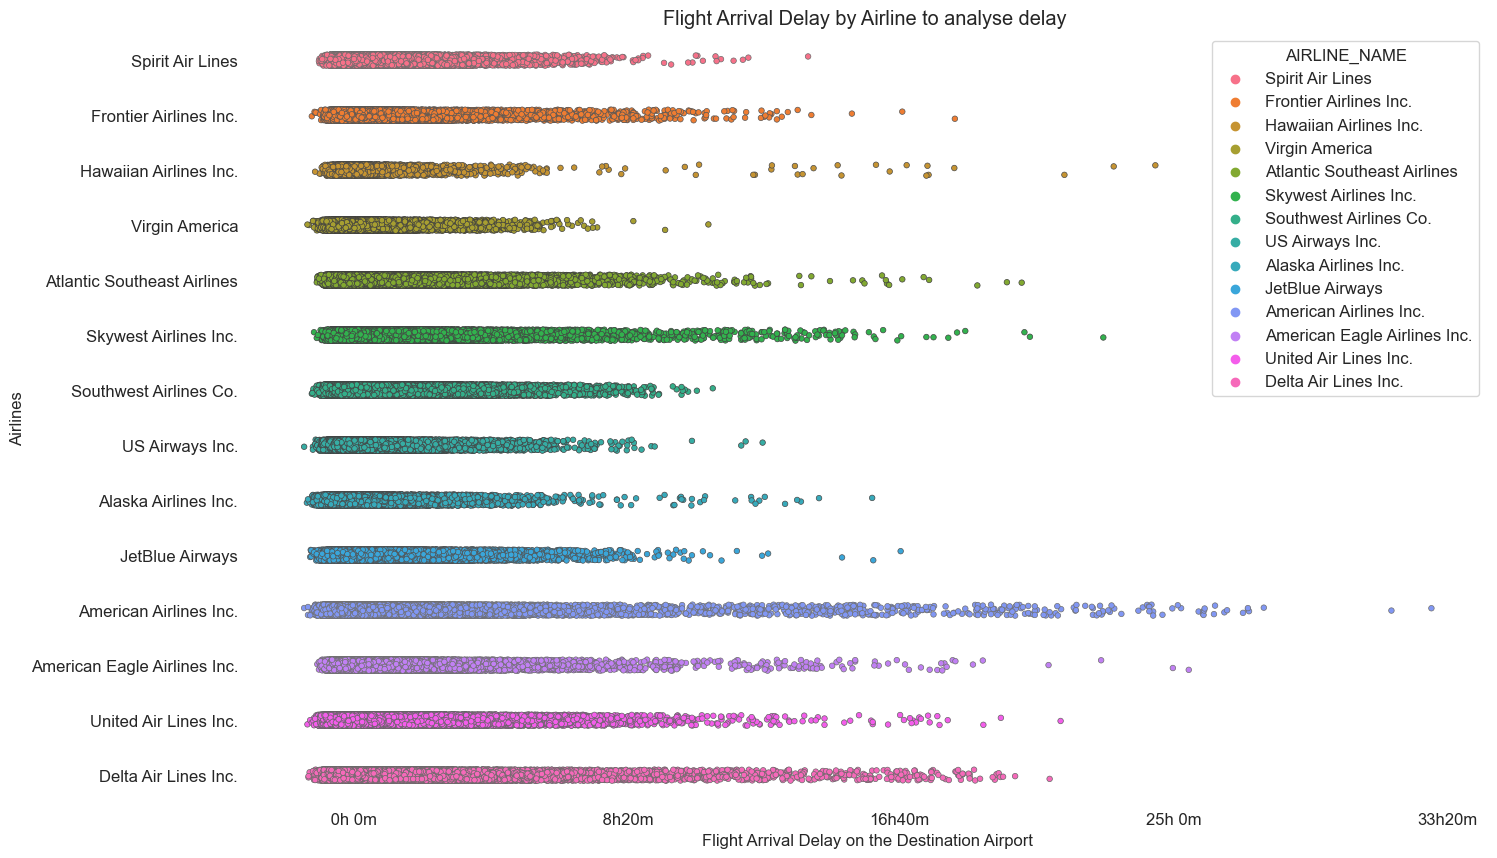

In [39]:
font = {'family': 'normal', 'weight': 'bold', 'size': 15}
sns.set_style('whitegrid')


median_delays = dfoutputf.groupby('AIRLINE_NAME')['ARRIVAL_DELAY'].median().sort_values(ascending=False)

sorted_df = dfoutputf.set_index('AIRLINE_NAME').loc[median_delays.index].reset_index()


fig_dim = (16, 10)
fig, ax = plt.subplots(figsize=fig_dim)

sns.despine(bottom=True, left=True)
sns.stripplot(x='ARRIVAL_DELAY', y='AIRLINE_NAME', hue='AIRLINE_NAME', data=sorted_df, size=4, linewidth=0.5, jitter=True)


plt.title('Flight Arrival Delay by Airline to analyse delay ')
plt.xlabel('Flight Arrival Delay on the Destination Airport')
plt.ylabel('Airlines')

ax.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x, 60)]) for x in ax.get_xticks()])

ax.yaxis.label.set_visible(True)

plt.grid(True, linestyle='--', alpha=0.7)
plt.grid(False)

plt.show()


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : The graph plots datapoints of duration of delays for all the airlines. Most delays are short in nature (under 4 hours) across all airlines, though the last four airlines have more occurrences of longer delays.  </h1>

## Exploring Arrival Delay by Month

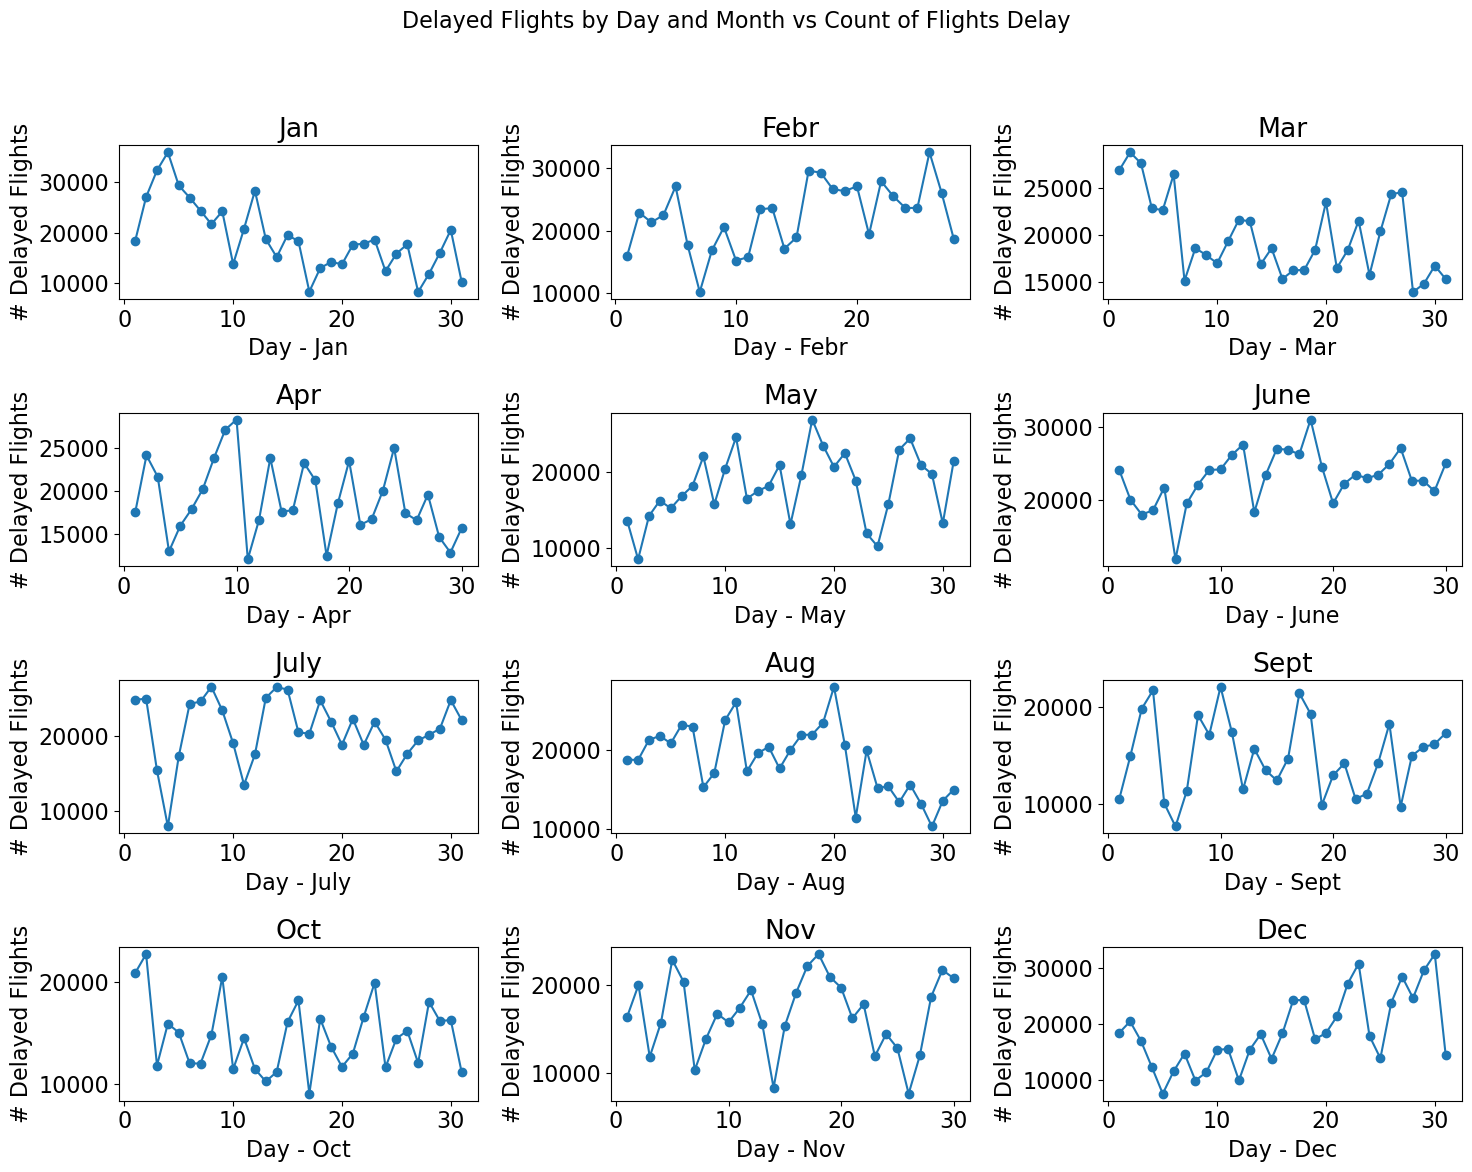

In [45]:
# Mapping month column for line chart visualization
month_names = {
    1: 'Jan',
    2: 'Febr',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'Aug',
    9: 'Sept',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}


fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Delayed Flights by Day and Month vs Count of Flights Delay', fontsize=16)

# Iterate through the months
for month in range(1, 13):
    row = (month - 1) // 3  
    col = (month - 1) % 3   
    
    
    monthly_data = delay_flights[delay_flights['MONTH'] == month]
    
    days_in_month = monthly_data['DAY'].nunique()

    x = list(range(1, days_in_month + 1))
    y = [len(monthly_data[monthly_data['DAY'] == day]) / days_in_month * 100 for day in x]  # Calculate percentage
    
    ax = axes[row, col]
    ax.plot(x, y, marker='o', linestyle='-')
    
    ax.set_xlabel(f'Day - {month_names[month]}')
    ax.set_ylabel('# Delayed Flights')
    ax.set_title(month_names[month])
    

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.grid(False)
plt.show()

<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : More delays were witnessed in the winter months of December, January and February. No clear pattern emerges for delays spanning during the dates of months. Perhaps, it is because the number of flights (and thus, the number of delayed flights) are impacted by calendar events like festivals, etc.  </h1>

### Percentage and Count of Delayed Flights by Month

Jan: Percentage - 40.07%, Count - 183110
Febr: Percentage - 43.04%, Count - 175443
Mar: Percentage - 38.63%, Count - 190133
Apr: Percentage - 35.85%, Count - 171820
May: Percentage - 35.78%, Count - 175178
June: Percentage - 42.00%, Count - 206989
July: Percentage - 38.83%, Count - 199717
Aug: Percentage - 35.89%, Count - 180891
Sept: Percentage - 28.87%, Count - 133432
Oct: Percentage - 29.25%, Count - 141250
Nov: Percentage - 32.32%, Count - 149439
Dec: Percentage - 38.21%, Count - 179494


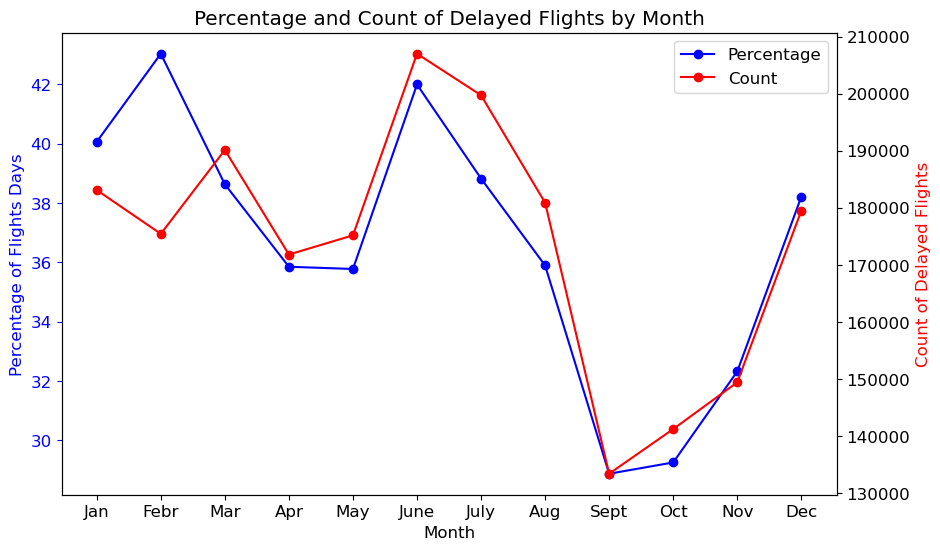

In [169]:
monthly_percentage = []
monthly_count = []

# Calculating the percentage and count of delayed flights
for month in range(1, 13):
    total_flights = dfoutputf[dfoutputf['MONTH'] == month].shape[0]
    delayed_flights = delay_flights[delay_flights['MONTH'] == month].shape[0]
    percentage = (delayed_flights / total_flights) * 100
    monthly_percentage.append(percentage)
    monthly_count.append(delayed_flights)
    print(f"{month_names[month]}: Percentage - {percentage:.2f}%, Count - {delayed_flights}")

# Plotting the Line Chart
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(list(month_names.values()), monthly_percentage, marker='o', linestyle='-', color='b', label='Percentage')
ax1.set_xlabel('Month')
ax1.set_ylabel('Percentage of Flights Days', color='b')
ax1.tick_params('y', colors='b')


ax2 = ax1.twinx()
ax2.plot(list(month_names.values()), monthly_count, marker='o', linestyle='-', color='r', label='Count')
ax2.set_ylabel('Count of Delayed Flights', color='r')


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Percentage and Count of Delayed Flights by Month')
plt.grid(False)
plt.show()


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : It can be seen that count of delayed flights and percentage of delayed flights go together, except during the month of February.  </h1>

## Exploring Average Departure Delay in time based on US States

In [170]:
# Calculating the average departure delay in minutes for each state
state_avg_delay = dfoutputf.groupby('ORIGIN_STATE')['DEPARTURE_DELAY'].mean().reset_index()


fig_state = px.choropleth(
    state_avg_delay,
    locations='ORIGIN_STATE',
    locationmode="USA-states",  
    color='DEPARTURE_DELAY',
    color_continuous_scale="YlOrRd",
    title="Average Departure Delay by State",
    scope="usa",
)


fig_state.update_geos(projection_scale=1)

fig_state.update_layout(width=1200,  height=800)


top_5_states = state_avg_delay.nlargest(5, 'DEPARTURE_DELAY')
bottom_5_states = state_avg_delay.nsmallest(5, 'DEPARTURE_DELAY')

print("Top 5 States with Highest Average Departure Delay in mins:")
print(top_5_states)

print("\nTop 5 States with Least Average Departure Delay in mins:")
print(bottom_5_states)

fig_state.show()


Top 5 States with Highest Average Departure Delay in mins:
   ORIGIN_STATE  DEPARTURE_DELAY
8            DE        29.568421
3            AS        20.965217
11           GU        15.083333
32           NJ        12.979498
21           MD        12.813128

Top 5 States with Least Average Departure Delay in mins:
   ORIGIN_STATE  DEPARTURE_DELAY
27           MT         2.016043
12           HI         2.125903
0            AK         2.659726
46           UT         4.388827
53           WY         4.623410


## Exploring Avergae Arrival Delay in Time based on US States

In [171]:
# Calculating the average arrival delay in minutes for each state
state_avg_delay = dfoutputf.groupby('DESTINATION_STATE')['ARRIVAL_DELAY'].mean().reset_index()


fig_state = px.choropleth(
    state_avg_delay,
    locations='DESTINATION_STATE',
    locationmode="USA-states",  
    color='ARRIVAL_DELAY',
    color_continuous_scale="YlOrRd",
    title="Average Arrival Delay by State",
    scope="usa",
)


fig_state.update_geos(
    projection_scale=1  
)


fig_state.update_layout(
    width=1200, 
    height=800 
)

top_5_states = state_avg_delay.nlargest(5, 'ARRIVAL_DELAY')
bottom_5_states = state_avg_delay.nsmallest(5, 'ARRIVAL_DELAY')

print("Top 5 States with Highest Average Arrival Delay in mins:")
print(top_5_states)

print("\nTop 5 States with Least Average Arrival Delay in mins:")
print(bottom_5_states)

fig_state.show()


Top 5 States with Highest Average Arrival Delay in mins:
   DESTINATION_STATE  ARRIVAL_DELAY
8                 DE      21.989474
11                GU      14.566667
49                VT       8.385727
3                 AS       7.844828
35                NY       7.617003

Top 5 States with Least Average Arrival Delay in mins:
   DESTINATION_STATE  ARRIVAL_DELAY
46                UT       0.127154
27                MT       0.438968
38                OR       1.760176
50                WA       1.859392
10                GA       1.984074


## Exploring the Average Departure Delay Time at the Origin Airport

In [172]:
# Calculating the average departure delay in minutes for each origin airport
airport_avg_delay = dfoutputf.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().reset_index()

top_5_airports = airport_avg_delay.nlargest(5, 'DEPARTURE_DELAY')
bottom_5_airports = airport_avg_delay.nsmallest(5, 'DEPARTURE_DELAY')


fig = px.bar(
    airport_avg_delay,
    x='DEPARTURE_DELAY',
    y='ORIGIN_AIRPORT',
    title="Average Departure Delay by Origin Airport",
    orientation='h' 
)

fig.update_layout(
    width=1200,  
    height=800 
)

print("Top 5 Airports with Highest Average Departure Delay in mins:")
print(top_5_airports)

print("\nTop 5 Airports with Least Average Departure Delay in mins:")
print(bottom_5_airports)

fig.show()


Top 5 Airports with Highest Average Departure Delay in mins:
    ORIGIN_AIRPORT  DEPARTURE_DELAY
155            ILG        29.568421
220            MVY        24.685185
148            HYA        23.182927
247            PPG        20.965217
232            OTH        19.000000

Top 5 Airports with Least Average Departure Delay in mins:
    ORIGIN_AIRPORT  DEPARTURE_DELAY
321            YAK        -6.265449
71             CNY        -6.058537
99             EKO        -3.933333
315            VEL        -3.740000
57             CDV        -3.460784


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation :  The highest average in departure delay is for Wilmington Airport (ILG). </h1>

## Exploring the Average Departure Delay Time at the Destination Airport

In [173]:
# Calculating the average arrival delay in minutes for each destination airport
airport_avg_delay = dfoutputf.groupby('DESTINATION_AIRPORT')['ARRIVAL_DELAY'].mean().reset_index()

top_5_airports = airport_avg_delay.nlargest(5, 'ARRIVAL_DELAY')
bottom_5_airports = airport_avg_delay.nsmallest(5, 'ARRIVAL_DELAY')


fig = px.bar(
    airport_avg_delay,
    x='ARRIVAL_DELAY',
    y='DESTINATION_AIRPORT',
    title="Average Arrival Delay by Destination Airport",
    orientation='h' 
)

fig.update_layout(
    width=1200,  
    height=800  
)

print("Top 5 Airports with Highest Average Arrival Delay in mins:")
print(top_5_airports)

print("\nTop 5 Airports with Least Average Arrival Delay in mins:")
print(bottom_5_airports)

fig.show()


Top 5 Airports with Highest Average Arrival Delay in mins:
    DESTINATION_AIRPORT  ARRIVAL_DELAY
294                 STC      23.025974
155                 ILG      21.989474
232                 OTH      17.832215
306                 TTN      16.154429
19                  ASE      15.638035

Top 5 Airports with Least Average Arrival Delay in mins:
    DESTINATION_AIRPORT  ARRIVAL_DELAY
315                 VEL     -13.761421
71                  CNY     -11.575610
157                 IMT      -8.166667
35                  BLI      -6.802276
190                 LWS      -6.636933


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation :- The highest average in arrival delay is for St. Cloud Regional Airport (STC). An interesting insight is that the average for Valdez Airport (VEL) is negative, implying many flights arrive early here. </h1>

## Exploring Delay by flight distances

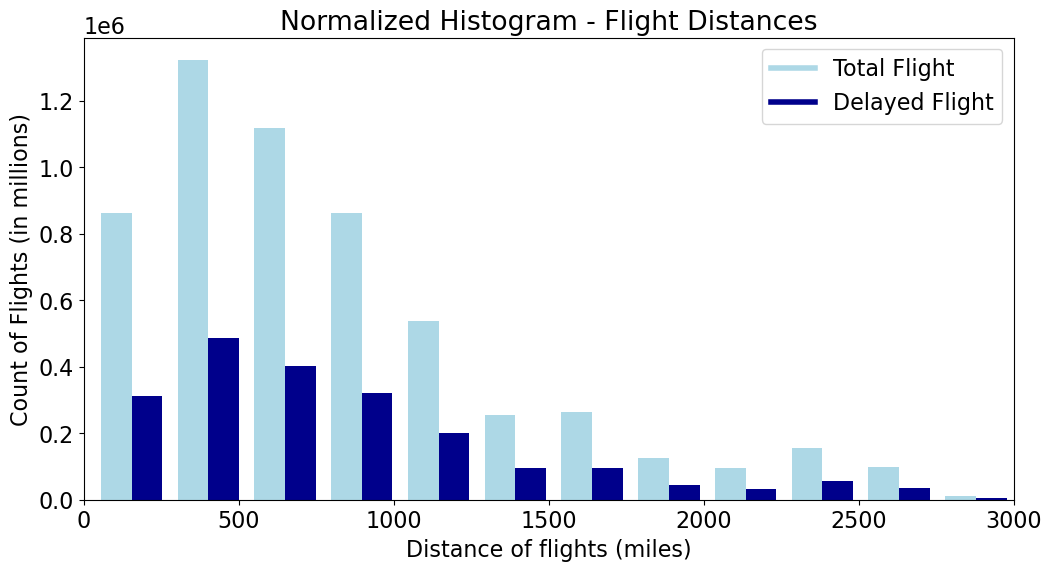

In [44]:
font = {'size': 16}
plt.rc('font', **font)

fig, ax = plt.subplots(figsize=(12, 6))
hist_data = [dfoutputf['DISTANCE'], delay_flights['DISTANCE']]
labels = ['Total Flight', 'Delayed Flight']
bins = 20
bar_colors = ['lightblue', 'darkblue']  
legend_colors = ['lightblue', 'darkblue']  

n, bins, patches = ax.hist(hist_data, bins=bins, label=labels, color=bar_colors)

legend_labels = [plt.Line2D([0], [0], color=color, lw=4) for color in legend_colors]

ax.set_xlim(0, 3000)
ax.set_xlabel('Distance of flights (miles)')
ax.set_ylabel('Count of Flights (in millions)')
ax.set_title('Normalized Histogram - Flight Distances')
plt.grid(False)

ax.legend(legend_labels, labels, loc='upper right')

plt.show()


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : No clear relationship can be established between the distance travelled and flight delays. As the distance covered by flight increases, the total flights flying decreases and so does the number of delayed flights.  </h1>

## Exploring the number of departure delayed flights in millions based on delay time categories

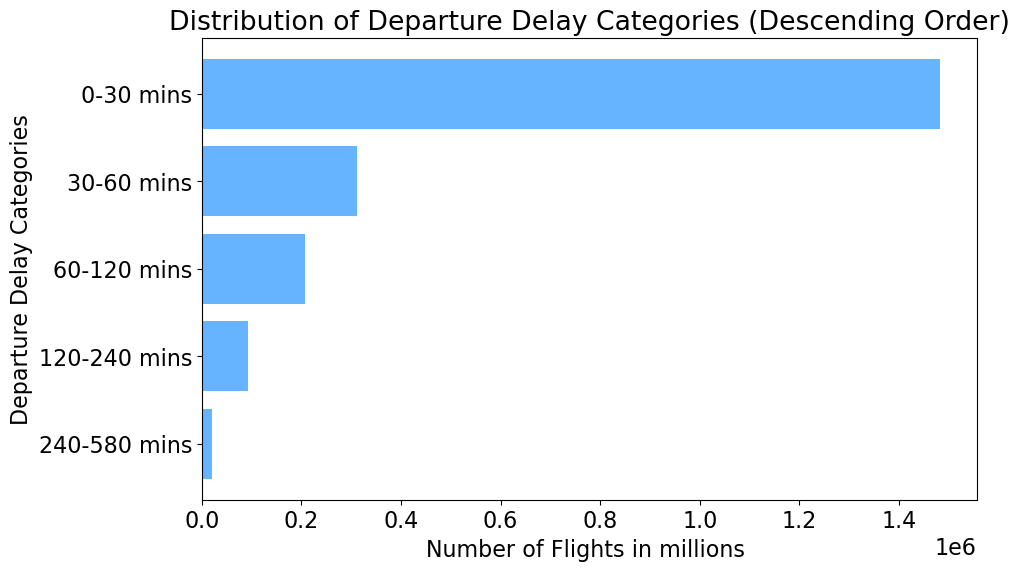

In [175]:
# Creating categories for departure delay in minutes
categories = ['0-30 mins', '30-60 mins', '60-120 mins', '120-240 mins', '240-580 mins']
bins = [0, 30, 60, 120, 240, 580]

dfoutputf['Delay_Category'] = pd.cut(dfoutputf['DEPARTURE_DELAY'], bins=bins, labels=categories)

category_counts = dfoutputf['Delay_Category'].value_counts()
sorted_categories = categories[::-1]

plt.figure(figsize=(10, 6))
plt.barh(sorted_categories, category_counts[sorted_categories], color='#66b3ff')


plt.xlabel('Number of Flights in millions ')
plt.ylabel('Departure Delay Categories')
plt.title('Distribution of Departure Delay Categories (Descending Order)')
plt.grid(False)

plt.show()

<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : It can be observed that the delays for a sizeable portion of flights remains under 30 minutes.  </h1>

<h1 align="left"  style=" color:#000; background-color:#90EE90; padding:10px;">Section V: Feature Engineering - II

## Removing Irrelevant Features from our dataframe

In [176]:
dfoutputf.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'AIRLINE_NAME', 'ORIGIN_CITY', 'ORIGIN_STATE',
       'DESTINATION_CITY', 'DESTINATION_STATE', 'ORIGIN_LATITUDE',
       'ORIGIN_LONGITUDE', 'DESTINATION_LATITUDE', 'DESTINATION_LONGITUDE',
       'FLIGHT_DELAY_CATEGORY', 'FLIGHT_DELAY', 'Time_Period',
       'DAY_OF_WEEK_NAME', 'Delay_Category'],
      dtype='object')

In [177]:
dfoutputf.shape

(5714008, 38)

In [178]:
# Passengers will not have data about these columns before departure of the flight
columns_to_drop = ['DEPARTURE_DELAY','DEPARTURE_TIME', 'TAXI_OUT','WHEELS_OFF', 'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON',
                   'TAXI_IN', 'ARRIVAL_TIME', 'DIVERTED', 'CANCELLED',
                   'ORIGIN_LATITUDE','ORIGIN_LONGITUDE', 'DESTINATION_LATITUDE', 'DESTINATION_LONGITUDE',
                   'FLIGHT_DELAY', 'YEAR', 'Time_Period', 'DAY_OF_WEEK', 'Delay_Category'
                  ]
for column in columns_to_drop:
    if column in dfoutputf.columns:
        dfoutputf.drop(column, axis=1, inplace=True)
    else:
        print(f"Column '{column}' not found in the DataFrame.")  

In [179]:
dfoutputf.shape

(5714008, 18)

## Identifying, Fixing and Removing the Outliers using IQR, Boxplot, Histogram Plot and Manually studying each variable for odd values

In [180]:
def find_columns_with_outliers(df, iqr_multiplier=1.5):
    columns_with_outliers = []
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - iqr_multiplier * IQR
            upper_bound = Q3 + iqr_multiplier * IQR
            column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            if not column_outliers.empty:
                columns_with_outliers.append(column)
    return columns_with_outliers

columns_with_outliers = find_columns_with_outliers(dfoutputf)
print("Columns with outliers:", columns_with_outliers)


Columns with outliers: ['SCHEDULED_TIME', 'DISTANCE', 'ARRIVAL_DELAY']


In [181]:
continuous_variable_names = dfoutputf.select_dtypes(include=['int64', 'float64']).columns
print(continuous_variable_names)

Index(['MONTH', 'DAY', 'SCHEDULED_TIME', 'DISTANCE', 'ARRIVAL_DELAY',
       'FLIGHT_DELAY_CATEGORY'],
      dtype='object')


In [182]:
outlier_counts = {}

for column in columns_with_outliers:
    # Calculating the  Interquartile Range (IQR) that ranges between the first quartile (Q1) and the third quartile (Q3) of a dataset. 
    Q1 = dfoutputf[column].quantile(0.25)
    Q3 = dfoutputf[column].quantile(0.75)
    IQR = Q3 - Q1

    # upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Counting the number of outliers
    num_outliers = len(dfoutputf[(dfoutputf[column] < lower_bound) | (dfoutputf[column] > upper_bound)])

    outlier_counts[column] = num_outliers

print("Number of outliers in each variable:")
print(outlier_counts)


Number of outliers in each variable:
{'SCHEDULED_TIME': 4817, 'DISTANCE': 7506, 'ARRIVAL_DELAY': 217093}


In [183]:
for column in columns_with_outliers:
    min_value = dfoutputf[column].min()
    max_value = dfoutputf[column].max()
    print(f"{columns_with_outliers.index(column) + 1}. {column}: Min = {min_value}, Max = {max_value}")

1. SCHEDULED_TIME: Min = 18.0, Max = 718.0
2. DISTANCE: Min = 31, Max = 4983
3. ARRIVAL_DELAY: Min = -87.0, Max = 1971.0


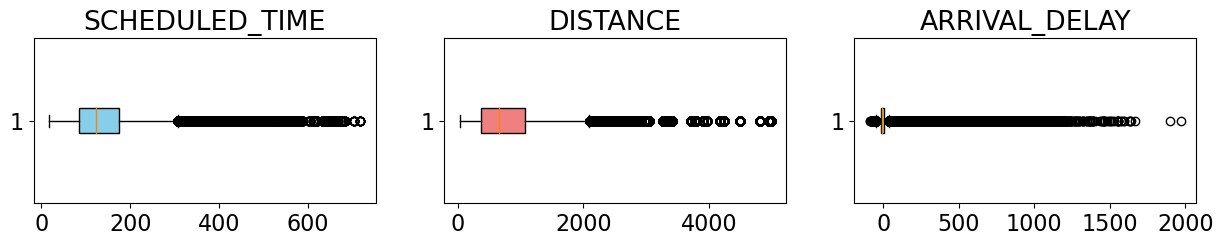

In [184]:
columns_for_box_plots = ['SCHEDULED_TIME', 'DISTANCE', 'ARRIVAL_DELAY'] # for the 3 variables with outliers

fig, axs = plt.subplots(5, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

boxplot_colors = ['skyblue', 'lightcoral', 'lightgreen']

for i, (column, color) in enumerate(zip(columns_for_box_plots, boxplot_colors)):
    row = i // 3
    col = i % 3
    

    box = axs[row, col].boxplot(dfoutputf[column], vert=False, patch_artist=True)

    for patch in box['boxes']:
        patch.set_facecolor(color)
    
    axs[row, col].set_title(column)

# Remove empty subplots
for i in range(len(columns_for_box_plots), 15):
    row = i // 3
    col = i % 3
    fig.delaxes(axs[row, col])
plt.grid(False)
plt.show()


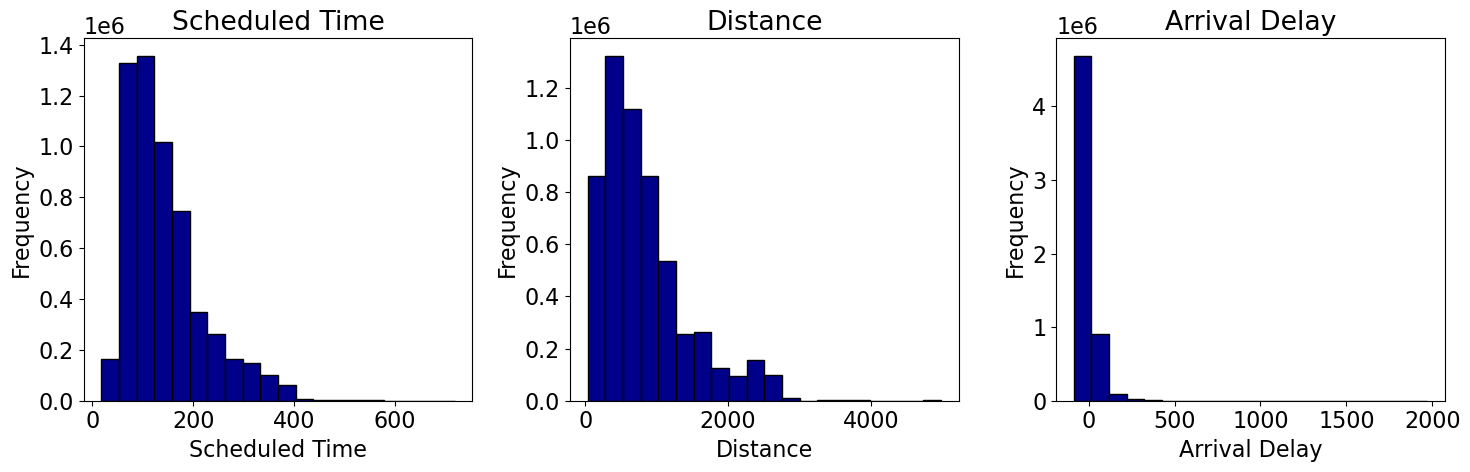

In [185]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Histogram for 'SCHEDULED_TIME' column
axes[0].hist(dfoutputf['SCHEDULED_TIME'], bins=20, color='darkblue', edgecolor='black')
axes[0].set_title('Scheduled Time')
axes[0].set_xlabel('Scheduled Time')
axes[0].set_ylabel('Frequency')

# Histogram for 'DISTANCE' columnn
axes[1].hist(dfoutputf['DISTANCE'], bins=20, color='darkblue', edgecolor='black')
axes[1].set_title('Distance')
axes[1].set_xlabel('Distance')
axes[1].set_ylabel('Frequency')

# Histogram for 'ARRIVAL_DELAY' column
axes[2].hist(dfoutputf['ARRIVAL_DELAY'], bins=20, color='darkblue', edgecolor='black')
axes[2].set_title('Arrival Delay')
axes[2].set_xlabel('Arrival Delay')
axes[2].set_ylabel('Frequency')
plt.tight_layout()

plt.show()


### We see outliers in Schedules Time, Distance and Arrival Delay

We decide not to remove outliers as these outliers are values of flights that were delayed, so they would help us detect the flight delays. The model would be biased in a way that would help our solution.

Moreover, 
1. Our target variable would be derived from the arrival delay and the arrival delay column would be deleted.
2. On further steps below, we would also remove Distance column due to multicollinearity. So we decide to move ahead with the outliers

## Balancing Target Variable by undersampling 

In [ ]:
# For fairness and unbiasedness in predictions, we did undersampling in Class 0 (On time) and Class I (Minor Delay)

In [189]:
dfoutputf['FLIGHT_DELAY_CATEGORY'].value_counts()

0    3627112
1    1063398
2    1023498
Name: FLIGHT_DELAY_CATEGORY, dtype: int64

In [190]:
desired_samples = 1023498  # these are the number of samples for each class of the target variable


class_0 = dfoutputf[dfoutputf['FLIGHT_DELAY_CATEGORY'] ==  0]
class_1 = dfoutputf[dfoutputf['FLIGHT_DELAY_CATEGORY'] ==  1]
class_2 = dfoutputf[dfoutputf['FLIGHT_DELAY_CATEGORY'] ==  2]

undersampled_class_0 = resample(class_0, replace=False, n_samples=desired_samples, random_state=42)
undersampled_class_1 = resample(class_1, replace=False, n_samples=desired_samples, random_state=42)

In [191]:
# Concatenating the undersampled majority classes with their respective minority classes
undersampled_df = pd.concat([
    undersampled_class_0, undersampled_class_1, class_2
])
undersampled_df = undersampled_df.sample(frac=1, random_state=42)

undersampled_df['FLIGHT_DELAY_CATEGORY'].value_counts()

1    1023498
2    1023498
0    1023498
Name: FLIGHT_DELAY_CATEGORY, dtype: int64

The new dataframe 'dfoutput' contains equal samples for all 3 classes of target variable without altering the original DataFrame 'undersampled_df'

In [192]:
dfoutput = undersampled_df

In [193]:
dfoutput.shape

(3070494, 18)

In [194]:
dfoutput.head()

,MONTH,DAY,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,AIRLINE_NAME,ORIGIN_CITY,ORIGIN_STATE,DESTINATION_CITY,DESTINATION_STATE,FLIGHT_DELAY_CATEGORY,DAY_OF_WEEK_NAME
3585687,8,11,1680,N7752B,LAS,OAK,12:45,90.0,407,14:15,7.0,Southwest Airlines Co.,Las Vegas,NV,Oakland,CA,1,TUESDAY
3646440,8,14,1563,N523US,ATL,JAX,23:25,67.0,270,00:32,58.0,Delta Air Lines Inc.,Atlanta,GA,Jacksonville,FL,2,FRIDAY
4295005,9,25,117,N486HA,KOA,HNL,08:14,43.0,163,08:57,-7.0,Hawaiian Airlines Inc.,Kailua/Kona,HI,Honolulu,HI,0,FRIDAY
676512,2,14,609,N419AS,LAS,SEA,15:00,155.0,867,17:35,4.0,Alaska Airlines Inc.,Las Vegas,NV,Seattle,WA,1,SATURDAY
3864631,8,28,412,N152DL,LAX,JFK,11:35,345.0,2475,20:20,8.0,Delta Air Lines Inc.,Los Angeles,CA,New York,NY,1,FRIDAY


<h1 align="left"  style=" color:#000; background-color:#90EE90; padding:10px;">Section VI: Feature Selection

In [195]:
# Finding the total number of numeric variables and numeric + categorical variables
numeric_variable_count = len(dfoutput.select_dtypes(include=['int64', 'float64']).columns)
all_variable_names = dfoutput.columns
total_variable_count = len(all_variable_names)

print("Total number of numeric variables:", numeric_variable_count)
print("Total number of variables (categorical and numeric):", total_variable_count)


Total number of numeric variables: 6
Total number of variables (categorical and numeric): 18


In [196]:
# removing all the object datatype variables
dfFlights_corr=dfoutput.corr(numeric_only=True) 

In [197]:
print(dfoutput.dtypes) # out of 18 attributes we have 6 numeric values like float , int in the correlation matrix

MONTH                      int64
DAY                        int64
FLIGHT_NUMBER             object
TAIL_NUMBER               object
ORIGIN_AIRPORT            object
DESTINATION_AIRPORT       object
SCHEDULED_DEPARTURE       object
SCHEDULED_TIME           float64
DISTANCE                   int64
SCHEDULED_ARRIVAL         object
ARRIVAL_DELAY            float64
AIRLINE_NAME              object
ORIGIN_CITY               object
ORIGIN_STATE              object
DESTINATION_CITY          object
DESTINATION_STATE         object
FLIGHT_DELAY_CATEGORY      int64
DAY_OF_WEEK_NAME          object
dtype: object


## a. Using pair plot/scatterplot matrix for exploring relationships between numeric or continuous variables.

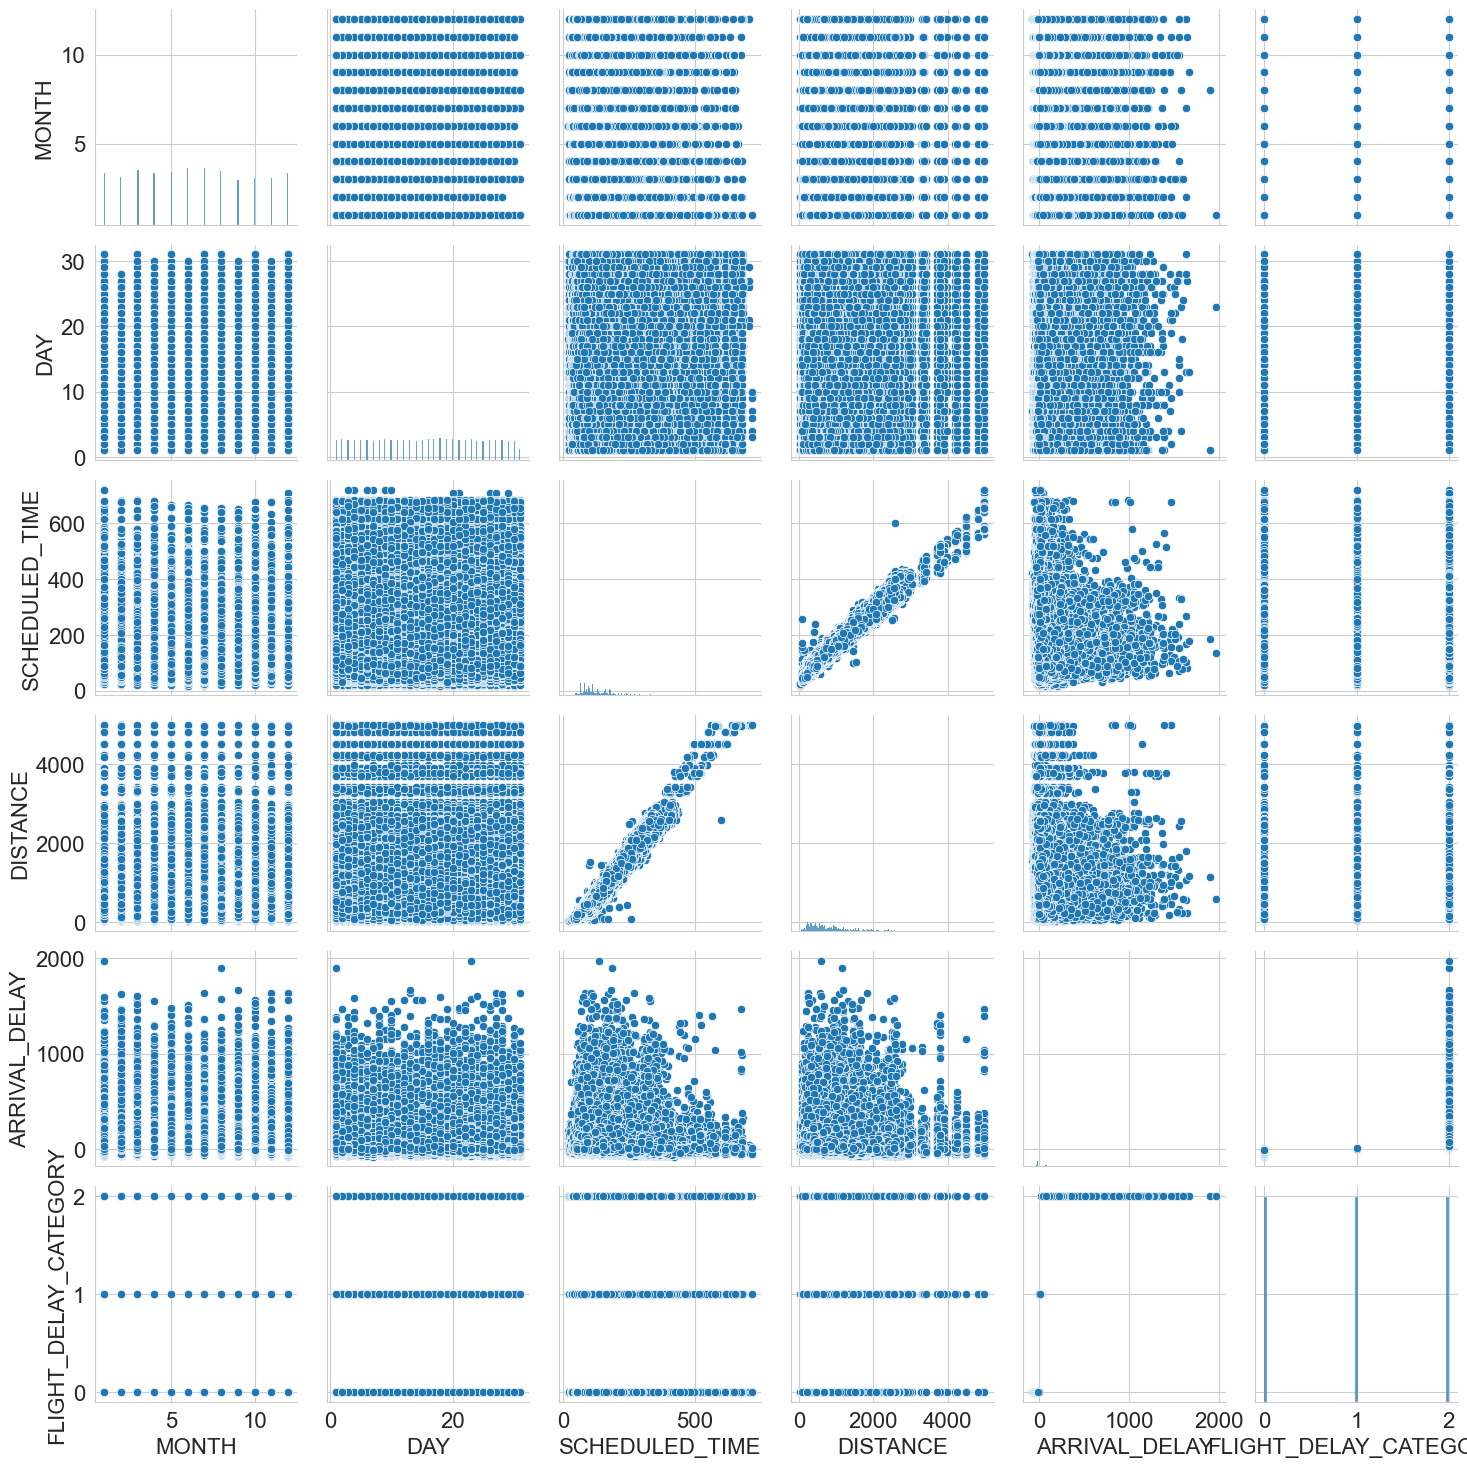

In [78]:
# Creating a pairplot 
sns.pairplot(dfoutput)
plt.grid(False)
plt.show()

## b. Feature Selection by using Correlation matrix - (numeric or continuous variables)

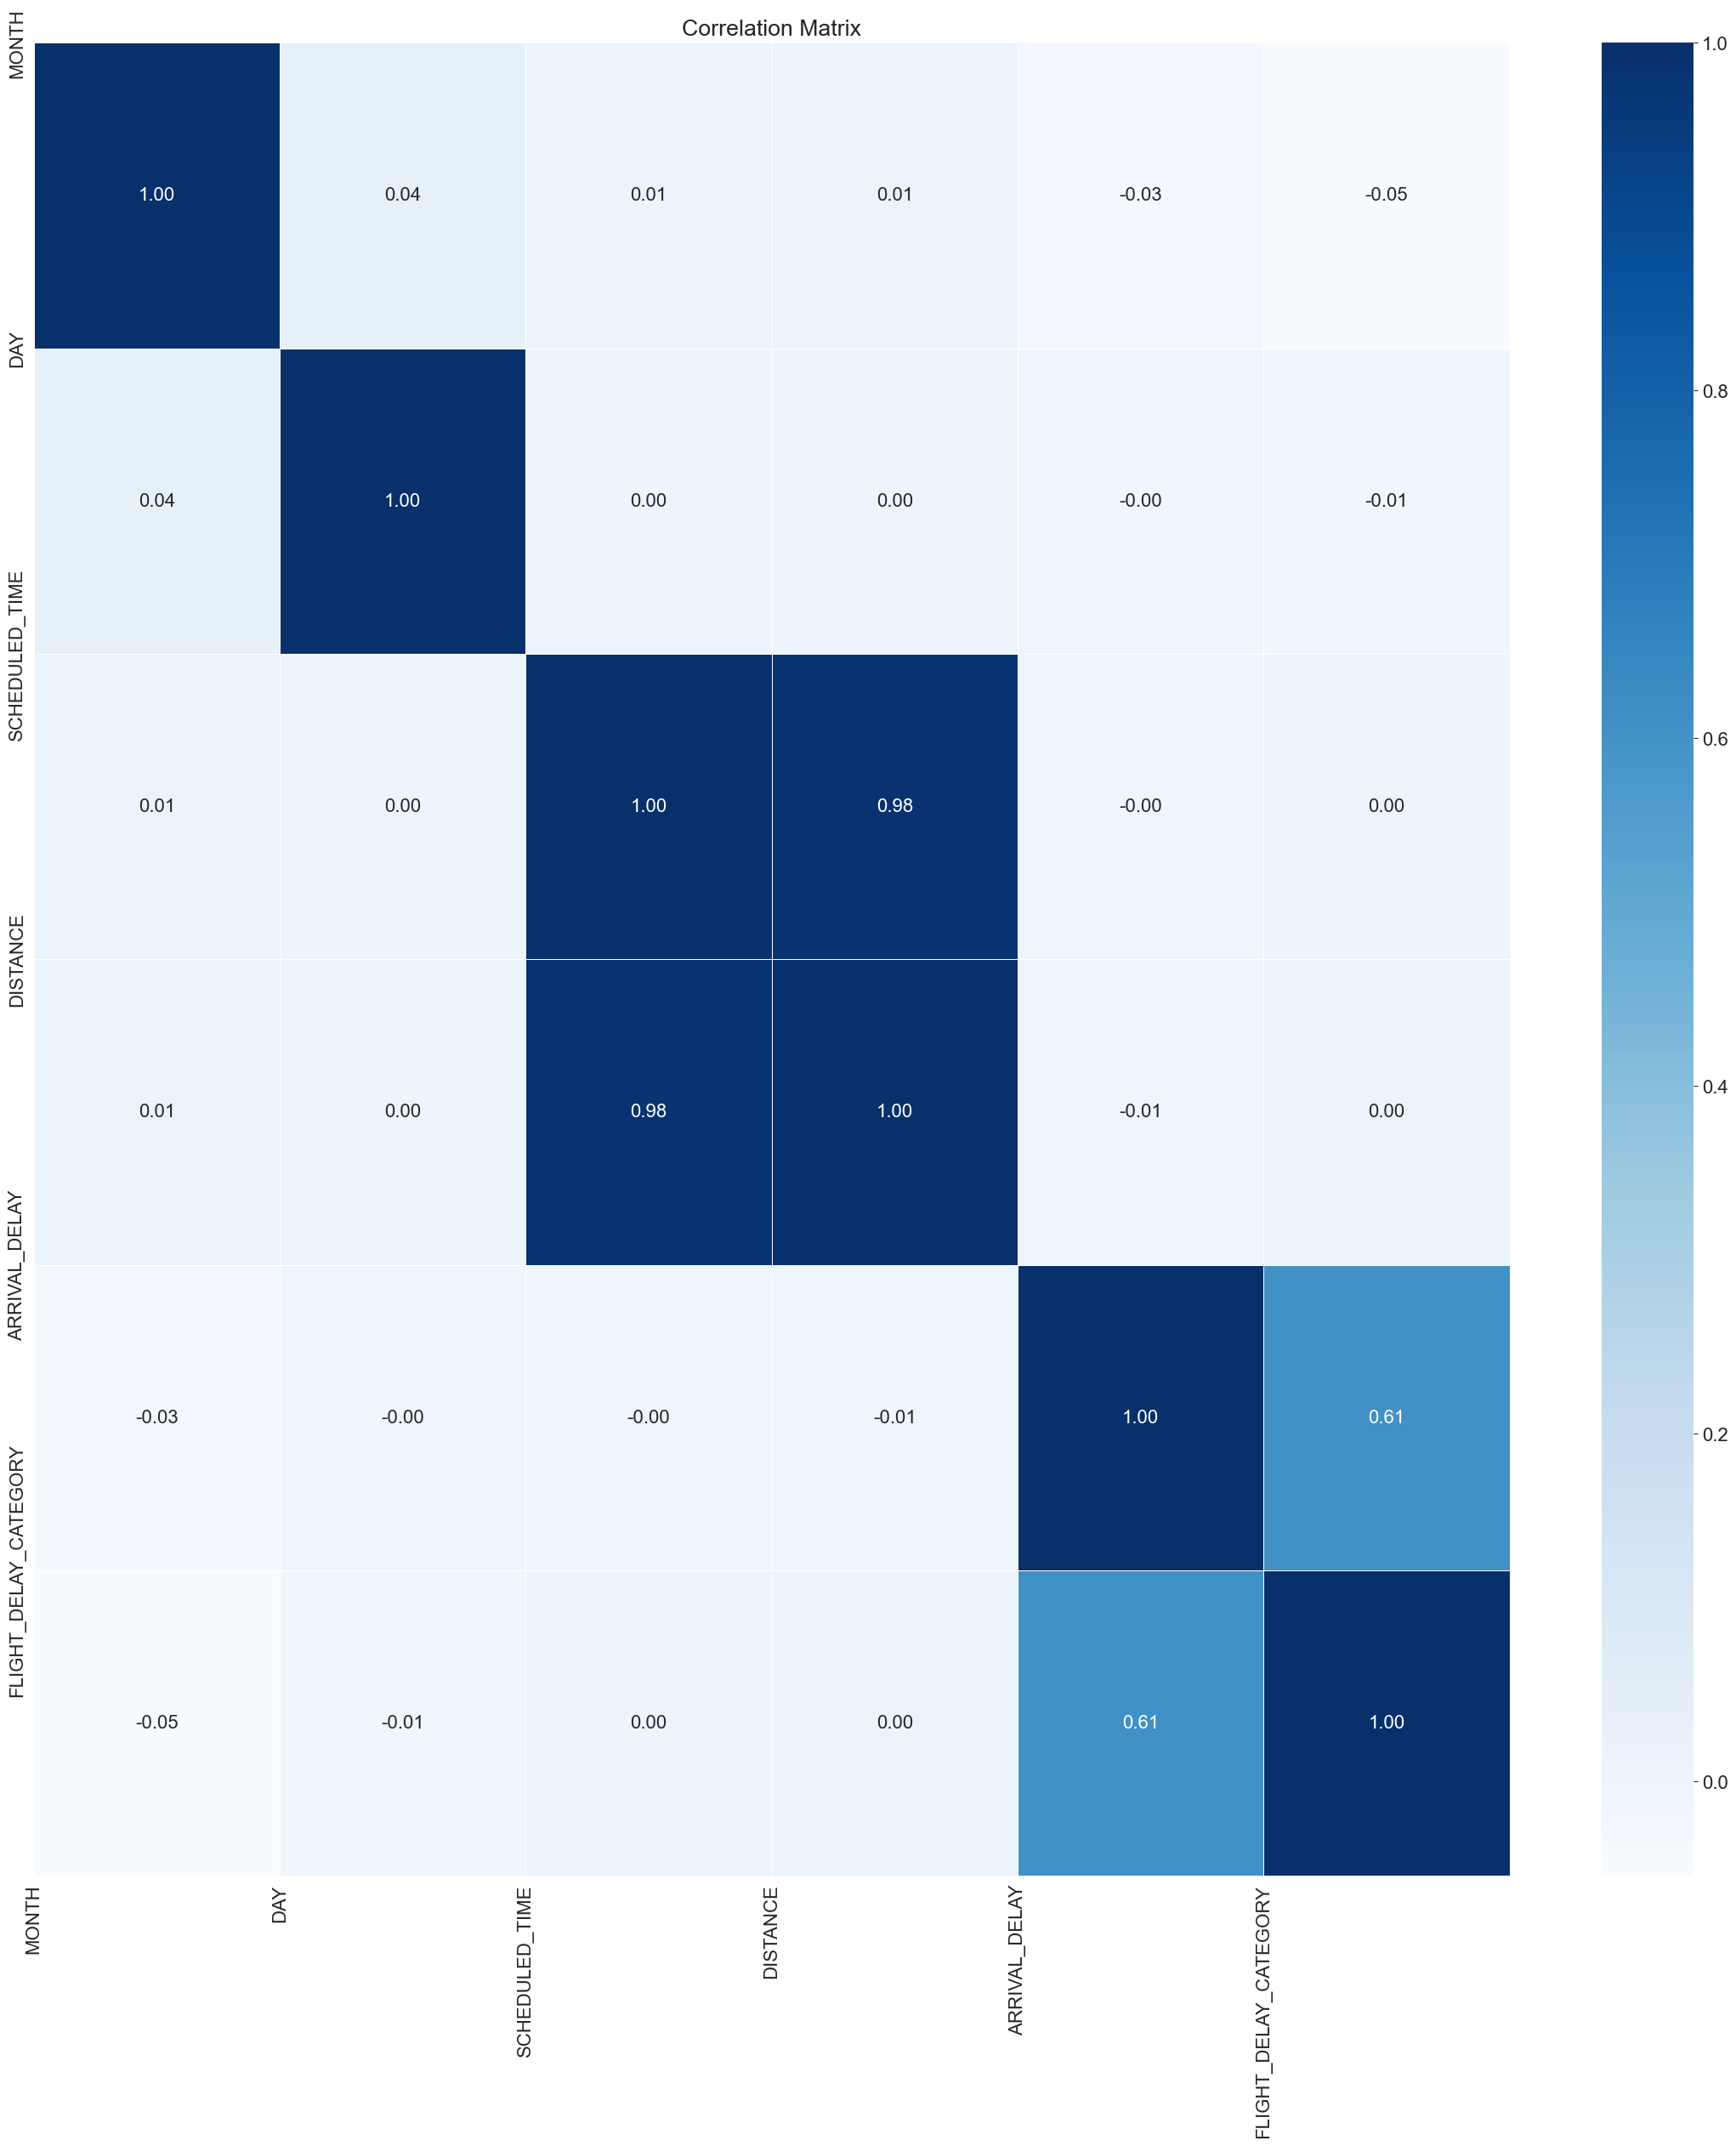

In [79]:
fig, ax = plt.subplots(figsize=(28, 28))
sns.heatmap(dfFlights_corr, annot=True, linewidths=0.5, fmt=".2f", cmap='Blues')

plt.xticks(range(len(dfFlights_corr.columns)), dfFlights_corr.columns);
ax.set_xticklabels( dfFlights_corr.columns, rotation = 90)
plt.yticks(range(len(dfFlights_corr.columns)), dfFlights_corr.columns);
plt.title("Correlation Matrix") 
plt.show()

### We could interpret that the input variables are not having strong correlation with target variable - ['ARRIVAL_DELAY']

In [198]:
dfoutput.columns

Index(['MONTH', 'DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME',
       'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_DELAY', 'AIRLINE_NAME',
       'ORIGIN_CITY', 'ORIGIN_STATE', 'DESTINATION_CITY', 'DESTINATION_STATE',
       'FLIGHT_DELAY_CATEGORY', 'DAY_OF_WEEK_NAME'],
      dtype='object')

### We drop ['DISTANCE'] as it has high correlation with ['SCHEDULED_TIME']. 
We drop 'DISTANCE' because it has lesser correlation with arrival_delay (target variable will be derived from this) but high correlation with  'SCHEDULED_TIME' (another input variable)

### We drop 'ARRIVAL_DELAY' because we use 'FLIGHT_DELAY_CATEGORY' (target variable), which is derived from  'ARRIVAL_DELAY'
Hence, we drop 2 columns 

In [199]:
dfoutput.dtypes

MONTH                      int64
DAY                        int64
FLIGHT_NUMBER             object
TAIL_NUMBER               object
ORIGIN_AIRPORT            object
DESTINATION_AIRPORT       object
SCHEDULED_DEPARTURE       object
SCHEDULED_TIME           float64
DISTANCE                   int64
SCHEDULED_ARRIVAL         object
ARRIVAL_DELAY            float64
AIRLINE_NAME              object
ORIGIN_CITY               object
ORIGIN_STATE              object
DESTINATION_CITY          object
DESTINATION_STATE         object
FLIGHT_DELAY_CATEGORY      int64
DAY_OF_WEEK_NAME          object
dtype: object

### Fixing some more missing values present in the mapped variables

In [200]:
missing_values=dfoutput.isnull().sum()
print(missing_values)

MONTH                       0
DAY                         0
FLIGHT_NUMBER               0
TAIL_NUMBER                 0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
SCHEDULED_TIME              0
DISTANCE                    0
SCHEDULED_ARRIVAL           0
ARRIVAL_DELAY               0
AIRLINE_NAME                0
ORIGIN_CITY              1816
ORIGIN_STATE             1816
DESTINATION_CITY         1951
DESTINATION_STATE        1951
FLIGHT_DELAY_CATEGORY       0
DAY_OF_WEEK_NAME            0
dtype: int64


In [201]:
dfoutput.dropna(inplace=True)

In [202]:
dfoutput['SCHEDULED_ARRIVAL']

3585687    14:15
3646440    00:32
4295005    08:57
676512     17:35
3864631    20:20
           ...  
3332029    19:50
1594373    22:20
890516     18:18
3735437    14:29
854271     07:20
Name: SCHEDULED_ARRIVAL, Length: 3066727, dtype: object

In [203]:
time_columns = ['SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE']

# Converting the values in the specified columns to HHMM format (int) with leading zeros
for col in time_columns:
    dfoutput[col] = dfoutput[col].apply(lambda x: f'{x:04}').str.replace(':', '').astype(int)

In [204]:
dfoutput['SCHEDULED_ARRIVAL']

3585687    1415
3646440      32
4295005     857
676512     1735
3864631    2020
           ... 
3332029    1950
1594373    2220
890516     1818
3735437    1429
854271      720
Name: SCHEDULED_ARRIVAL, Length: 3066727, dtype: int64

## Using Label Encoding for categorical variables (object dtypes)

In [ ]:
# Label encoding is used to convert categorical data into numerical format. 
# It assigns a unique numerical value to each category or label in the categorical variable. 

In [205]:
xcol = ['MONTH', 'DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIRLINE_NAME',
       'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE',
       'DESTINATION_AIRPORT', 'DESTINATION_CITY', 'DESTINATION_STATE',
       'SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL', 'SCHEDULED_TIME', 'DAY_OF_WEEK_NAME']

le = LabelEncoder()

columns_to_encode = ['FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIRLINE_NAME',
       'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE',
       'DESTINATION_AIRPORT', 'DESTINATION_CITY', 'DESTINATION_STATE', 'DAY_OF_WEEK_NAME' ]
# We Label encoded the columns directly in the 'dfoutput_encoded' DataFrame
for column in columns_to_encode:
    dfoutput[column] = le.fit_transform(dfoutput[column])

In [206]:
allfeatures = ['MONTH', 'DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIRLINE_NAME',
       'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE',
       'DESTINATION_AIRPORT', 'DESTINATION_CITY', 'DESTINATION_STATE', 
        'SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL', 'SCHEDULED_TIME', 'DAY_OF_WEEK_NAME', 'FLIGHT_DELAY_CATEGORY']

model_data0 = dfoutput[allfeatures]


In [207]:
model_data0.shape

(3066727, 16)

In [208]:
model_data0.head(4)

,MONTH,DAY,FLIGHT_NUMBER,TAIL_NUMBER,AIRLINE_NAME,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,DESTINATION_AIRPORT,DESTINATION_CITY,DESTINATION_STATE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,SCHEDULED_TIME,DAY_OF_WEEK_NAME,FLIGHT_DELAY_CATEGORY
3585687,8,11,756,3556,9,174,163,34,222,215,5,1245,1415,90.0,5,1
3646440,8,14,626,2107,4,20,18,10,165,141,9,2325,32,67.0,0,2
4295005,9,25,190,1899,6,170,146,12,141,130,12,814,857,43.0,0,0
676512,2,14,5653,1655,0,174,163,34,277,266,50,1500,1735,155.0,2,1


In [209]:
x1 = model_data0[xcol]

In [210]:
y1 = model_data0['FLIGHT_DELAY_CATEGORY']

## Mutual Information, Lasso and Recursive Feature Elimination (RFE) for Feature Importance - Categorical variable

In [94]:
# Mutual Information Technique
mi_scores = mutual_info_classif(x1, y1)
mi_features = x1.columns[mi_scores > 0.01] 

# Lasso and Elastic Net Regression Technique
lasso_selector = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear'))
X_lasso = lasso_selector.fit_transform(x1, y1)
lasso_features = x1.columns[lasso_selector.get_support()]

# Recursive Feature Elimination (RFE) Technique
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=5) 
X_rfe = rfe_selector.fit_transform(x1, y1)
rfe_features = x1.columns[rfe_selector.get_support()]

/Users/rohit/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/rohit/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/rohit/anaconda3/l

In [95]:
print(mi_features)
print(lasso_features)
print(rfe_features)

Index(['MONTH', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIRLINE_NAME',
       'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE', 'DESTINATION_STATE',
       'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DAY_OF_WEEK_NAME'],
      dtype='object')
Index(['MONTH', 'DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIRLINE_NAME',
       'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE', 'DESTINATION_AIRPORT',
       'DESTINATION_CITY', 'DESTINATION_STATE', 'SCHEDULED_DEPARTURE',
       'SCHEDULED_ARRIVAL', 'SCHEDULED_TIME', 'DAY_OF_WEEK_NAME'],
      dtype='object')
Index(['MONTH', 'DAY', 'AIRLINE_NAME', 'ORIGIN_STATE', 'DAY_OF_WEEK_NAME'], dtype='object')


## Decision Tree Classifier for Feature Importance - Categorical

In [211]:
clf = DecisionTreeClassifier()
clf.fit(x1, y1)

# Function to get feature importances
feature_importances = pd.DataFrame({'feature': x1.columns, 'importance': clf.feature_importances_})

sorted_feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print(sorted_feature_importances)

                feature  importance
3           TAIL_NUMBER    0.202018
1                   DAY    0.135031
11  SCHEDULED_DEPARTURE    0.084998
2         FLIGHT_NUMBER    0.084276
12    SCHEDULED_ARRIVAL    0.080443
14     DAY_OF_WEEK_NAME    0.077074
13       SCHEDULED_TIME    0.076231
0                 MONTH    0.037677
8   DESTINATION_AIRPORT    0.037311
9      DESTINATION_CITY    0.036883
5        ORIGIN_AIRPORT    0.034221
6           ORIGIN_CITY    0.033207
10    DESTINATION_STATE    0.033180
7          ORIGIN_STATE    0.030038
4          AIRLINE_NAME    0.017414


We decide to go ahead with all the features here, as all features have less feature importance, removeing the least important feature won't improve the model metrics

## Selecting Important Features

In [212]:
important_features = ['MONTH', 'DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIRLINE_NAME',
       'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE',
       'DESTINATION_AIRPORT', 'DESTINATION_CITY', 'DESTINATION_STATE', 
       'SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL', 'SCHEDULED_TIME', 'DAY_OF_WEEK_NAME', 'FLIGHT_DELAY_CATEGORY']

all_columns = set(model_data0.columns)

columns_to_drop = list(all_columns - set(important_features))
model_data1 = model_data0.drop(columns=columns_to_drop)

In [213]:
model_data1.shape

(3066727, 16)

In [214]:
#Defining x1 - input variables 
x1 = model_data1[['MONTH', 'DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIRLINE_NAME',
       'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE',
       'DESTINATION_AIRPORT', 'DESTINATION_CITY', 'DESTINATION_STATE', 
       'SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL', 'SCHEDULED_TIME', 'DAY_OF_WEEK_NAME']]


In [215]:
x1.shape # stores the input variable shape

(3066727, 15)

In [216]:
#Defining y1 - target variable
y1 = model_data1[['FLIGHT_DELAY_CATEGORY']]

In [217]:
y1.shape # stores the target variable shape

(3066727, 1)

In [218]:
model_data1.columns

Index(['MONTH', 'DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIRLINE_NAME',
       'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE', 'DESTINATION_AIRPORT',
       'DESTINATION_CITY', 'DESTINATION_STATE', 'SCHEDULED_DEPARTURE',
       'SCHEDULED_ARRIVAL', 'SCHEDULED_TIME', 'DAY_OF_WEEK_NAME',
       'FLIGHT_DELAY_CATEGORY'],
      dtype='object')

## Normalization using Z-Score & Min-Max Scaling 

In [220]:
# Identifying numerical columns 
numerical_columns = x1.select_dtypes(include=['int64', 'float64']).columns

# MinMaxScaler  - For KNN model
min_max_scaler = MinMaxScaler()
#StandardScaler - For other models 
standard_scaler = StandardScaler()

# Applying MinMaxScaler - For KNN model
model_data_normalized_min_max = x1.copy()
model_data_normalized_min_max[numerical_columns] = min_max_scaler.fit_transform(model_data1[numerical_columns])

# Applying StandardScaler
model_data_normalized_standard = x1.copy()
model_data_normalized_standard[numerical_columns] = standard_scaler.fit_transform(model_data1[numerical_columns])

In [221]:
xmm1 = model_data_normalized_min_max[['MONTH', 'DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIRLINE_NAME',
       'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE',
       'DESTINATION_AIRPORT', 'DESTINATION_CITY', 'DESTINATION_STATE', 
       'SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL', 'SCHEDULED_TIME', 'DAY_OF_WEEK_NAME']]

In [222]:
xnor1 = model_data_normalized_standard[['MONTH', 'DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIRLINE_NAME',
       'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE',
       'DESTINATION_AIRPORT', 'DESTINATION_CITY', 'DESTINATION_STATE', 
       'SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL', 'SCHEDULED_TIME', 'DAY_OF_WEEK_NAME']]

## Taking out some rows for Prediction, before our model training step

In [223]:
tempnordf = pd.concat([xnor1, y1], axis=1)

In [224]:
rows_for_prediction_nor = tempnordf.sample(n=10)
model_data_nor = tempnordf.drop(rows_for_prediction_nor.index)

In [225]:
xnor = model_data_nor[['MONTH', 'DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIRLINE_NAME',
       'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE',
       'DESTINATION_AIRPORT', 'DESTINATION_CITY', 'DESTINATION_STATE', 
       'SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL', 'SCHEDULED_TIME', 'DAY_OF_WEEK_NAME']]

In [226]:
tempmmdf = pd.concat([xmm1, y1], axis=1)

In [227]:
rows_for_prediction_mm = tempmmdf.sample(n=10)
model_data_mm = tempmmdf.drop(rows_for_prediction_mm.index)

In [228]:
xmm = model_data_mm[['MONTH', 'DAY', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIRLINE_NAME',
       'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE',
       'DESTINATION_AIRPORT', 'DESTINATION_CITY', 'DESTINATION_STATE', 
       'SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL', 'SCHEDULED_TIME', 'DAY_OF_WEEK_NAME']]

In [230]:
xnor.shape

(3066717, 15)

In [229]:
xmm.shape

(3066717, 15)

<h1 align="left"  style=" color:#000; background-color:#90EE90; padding:10px;">Section VII: Model Development


<h1 align="left"  style=" color:#000; background-color:#ADD8E6; padding:10px;">Model 1. K-Nearest Neighbors (KNN)


In [140]:
y = model_data_mm[['FLIGHT_DELAY_CATEGORY']]
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(xmm, y, test_size=0.2, random_state=42)

# Finding the best value for 'k' 
best_k = None
best_accuracy = 0

for k in range(2,20, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train, y_train)
    y_preds = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_preds)

    print(f"Accuracy for k = {k} is: {accuracy}")


/Users/rohit/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy for k = 2 is: 0.39484073341780646


/Users/rohit/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy for k = 4 is: 0.4130638010951104


/Users/rohit/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy for k = 6 is: 0.4188569418340657


/Users/rohit/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy for k = 8 is: 0.4233162106963821


/Users/rohit/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy for k = 10 is: 0.42660284494187317


/Users/rohit/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy for k = 12 is: 0.42879176289328047


/Users/rohit/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy for k = 14 is: 0.43100511073253833


/Users/rohit/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy for k = 16 is: 0.43257676685092233


/Users/rohit/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy for k = 18 is: 0.4332152012534161


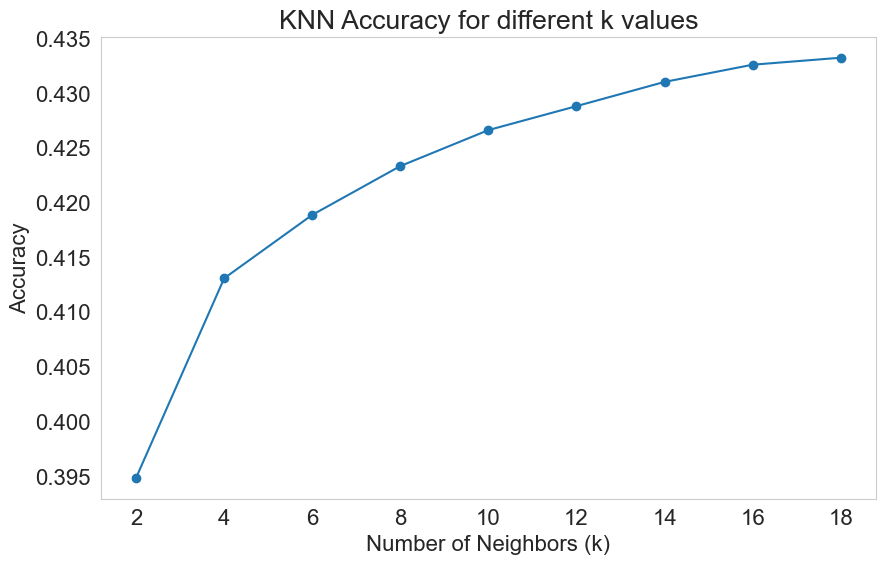

In [165]:
k_values = [2,4,6,8,10,12,14,16,18]
accuracies = [0.39484073341780646, 0.4130638010951104, 0.418856941834065, 0.4233162106963821, 0.42660284494187317, 0.42879176289328047, 0.43100511073253833, 0.43257676685092233, 0.4332152012534161]

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different k values')
plt.xticks(k_values)
plt.grid(False)
plt.show()

In [104]:
y = model_data_mm[['FLIGHT_DELAY_CATEGORY']]
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(xmm, y, test_size=0.2, random_state=42)

# Finding the best value for 'k'
best_k = None
best_accuracy = 0

for k in range(58,68, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train, y_train)
    y_preds = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_preds)

    print(f"Accuracy for k = {k} is: {accuracy}")

    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

print(f"Best k: {best_k}")
print(f"Best accuracy: {best_accuracy}")


/Users/rohit/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k = 58 is: 0.44015980403972627


/Users/rohit/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k = 60 is: 0.4403975882814714


/Users/rohit/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k = 62 is: 0.44074612134813895


/Users/rohit/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k = 64 is: 0.4406207145905062


/Users/rohit/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k = 66 is: 0.44043341878365216
Best k: 62
Best accuracy: 0.44074612134813895


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : We obtained the highest accuracy for k=62 for our model </h1>

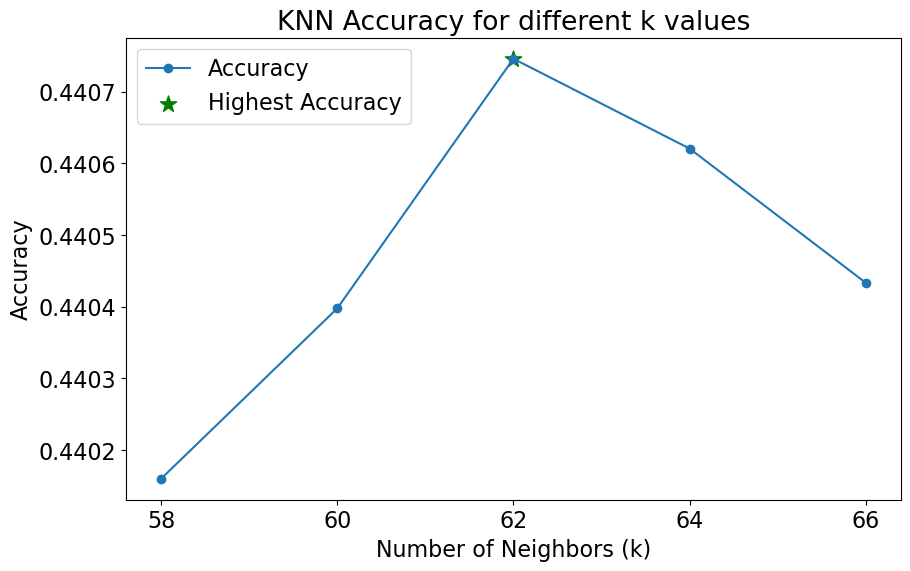

In [232]:
k_values = [58, 60, 62, 64, 66]
accuracies = [0.44015980403972627, 0.4403975882814714, 0.44074612134813895, 0.4406207145905062, 0.44043341878365216]

# highest accuracy
max_accuracy_index = accuracies.index(max(accuracies))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', label='Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different k values')
plt.xticks(k_values)
plt.scatter(k_values[max_accuracy_index], accuracies[max_accuracy_index], color='green', marker='*', s=150, label='Highest Accuracy')

plt.grid(False)
plt.legend()
plt.show()

In [105]:
# Creating and train the KNN model with the best k
knn = KNeighborsClassifier(n_neighbors=best_k)  
knn.fit(x_train, y_train)

# Predicting the target values on the test set
y_pred_knn = knn.predict(x_test)
y_prob_knn = knn.predict_proba(x_test)  

# Calculating accuracy, precision, recall, and F1-score
accuracy_knn2 = accuracy_score(y_test, y_pred_knn)
precision_knn2 = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn2 = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn2 = f1_score(y_test, y_pred_knn, average='weighted')
kappa_knn2 = cohen_kappa_score(y_test, y_pred_knn)
logloss_knn2 = log_loss(y_test, y_prob_knn)
roc_auc_knn2 = roc_auc_score(y_test, y_prob_knn, multi_class='ovr')
conf_matrix_knn2 = confusion_matrix(y_test, y_pred_knn)

print("K-Nearest Neighbors (KNN) Classifier Metrics:")
print("Accuracy:", accuracy_knn2)
print("Precision:", precision_knn2)
print("Recall:", recall_knn2)
print("F1-Score:", f1_knn2)
print("Cohen's Kappa:", kappa_knn2)
print("Log Loss:", logloss_knn2)
print("ROC AUC:", roc_auc_knn2)
print("Confusion Matrix:")
print(conf_matrix_knn2)

# Saving the trained KNN model to a file
knn_model_filename = 'knn_model_bal_nor.pkl'
joblib.dump(knn, knn_model_filename)
print(f"K-Nearest Neighbors (KNN) model saved as '{knn_model_filename}'")


/Users/rohit/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K-Nearest Neighbors (KNN) Classifier Metrics:
Accuracy: 0.44074612134813895
Precision: 0.43767727415150903
Recall: 0.44074612134813895
F1-Score: 0.43798143252211064
Cohen's Kappa: 0.16113973572373763
Log Loss: 1.0545382673258514
ROC AUC: 0.621654420321294
Confusion Matrix:
[[ 97253  53733  53169]
 [ 66433  69297  69194]
 [ 48961  51893 104069]]
K-Nearest Neighbors (KNN) model saved as 'knn_model2.pkl'


<h1 align="left"  style=" color:#000; background-color:#ADD8E6; padding:10px;">Model 2. XGBOOST Classifier


In [130]:
y = model_data_nor[['FLIGHT_DELAY_CATEGORY']]
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(xnor, y, test_size=0.2, random_state=42)

xgb_classifier = xgb.XGBClassifier()  
xgb_classifier.fit(x_train, y_train)

y_pred_xgb = xgb_classifier.predict(x_test)
y_prob_xgb = xgb_classifier.predict_proba(x_test)

# Calculating accuracy, precision, recall, and F1-score
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
kappa_xgb = cohen_kappa_score(y_test, y_pred_xgb)
logloss_xgb = log_loss(y_test, y_prob_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb, multi_class='ovr')
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)


print("XGBoost Classifier Metrics:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1-Score:", f1_xgb)
print("Cohen's Kappa:", kappa_xgb)
print("Log Loss:", logloss_xgb)
print("ROC AUC:", roc_auc_xgb)
print("Confusion Matrix:")
print(conf_matrix_xgb)


XGBoost Classifier Metrics:
Accuracy: 0.4766987729681662
Precision: 0.47107528660470255
Recall: 0.4766987729681662
F1-Score: 0.46997986561878585
Cohen's Kappa: 0.2149266543440661
Log Loss: 1.0213787556234686
ROC AUC: 0.661500659016144
Confusion Matrix:
[[111296  44546  48815]
 [ 69342  64990  69867]
 [ 46056  42682 116408]]


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : We got the highest accuracy and precision for XGBoost model as compared to other models</h1>

In [131]:
# Saving the trained XGBoost model to a file
model_filename_xgb = 'xgboost_bal_nor.pkl' 
joblib.dump(xgb_classifier, model_filename_xgb)

print(f"XGBoost model saved as '{model_filename_xgb}'")


XGBoost model saved as 'xgboost_bal_nor.pkl'


<h1 align="left"  style=" color:#000; background-color:#ADD8E6; padding:10px;">Model 3. AdaBoost Classifier


In [114]:
# Spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(xnor, y, test_size=0.2, random_state=42)

ada_classifier = AdaBoostClassifier()
ada_classifier.fit(x_train, y_train)
y_pred_ada = ada_classifier.predict(x_test)
y_prob_ada = ada_classifier.predict_proba(x_test)


accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada, average='weighted')
recall_ada = recall_score(y_test, y_pred_ada, average='weighted')
f1_ada = f1_score(y_test, y_pred_ada, average='weighted')
kappa_ada = cohen_kappa_score(y_test, y_pred_ada)
logloss_ada = log_loss(y_test, y_prob_ada)
roc_auc_ada = roc_auc_score(y_test, y_prob_ada, multi_class='ovr')
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)


print("AdaBoost Classifier Metrics:")
print("Accuracy:", accuracy_ada)
print("Precision:", precision_ada)
print("Recall:", recall_ada)
print("F1-Score:", f1_ada)
print("Cohen's Kappa:", kappa_ada)
print("Log Loss:", logloss_ada)
print("ROC AUC:", roc_auc_ada)
print("Confusion Matrix:")
print(conf_matrix_ada)

# Saving the trained AdaBoost model to a file
model_filename_ada = 'adaboost_model_bal_nor.pkl' 
joblib.dump(ada_classifier, model_filename_ada)

print(f"AdaBoost model saved as '{model_filename_ada}'")


/Users/rohit/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost Classifier Metrics:
Accuracy: 0.4170116709717558
Precision: 0.410878223589056
Recall: 0.4170116709717558
F1-Score: 0.40232460313461377
Cohen's Kappa: 0.12552650354752326
Log Loss: 1.0975168185094475
ROC AUC: 0.5927602518079192
Confusion Matrix:
[[ 94263  37567  72923]
 [ 72355  44243  88054]
 [ 52662  34395 117540]]
AdaBoost model saved as 'adaboost_model_bal_nor.pkl'



<h1 align="left"  style=" color:#000; background-color:#ADD8E6; padding:10px;">Model 4. GradientBoostingClassifier


In [110]:
x_train, x_test, y_train, y_test = train_test_split(xnor, y, test_size=0.2, random_state=42)

gbm_classifier = GradientBoostingClassifier()
gbm_classifier.fit(x_train, y_train)

y_pred_gbm = gbm_classifier.predict(x_test)
y_prob_gbm = gbm_classifier.predict_proba(x_test)


accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm, average='weighted')
recall_gbm = recall_score(y_test, y_pred_gbm, average='weighted')
f1_gbm = f1_score(y_test, y_pred_gbm, average='weighted')
kappa_gbm = cohen_kappa_score(y_test, y_pred_gbm)
logloss_gbm = log_loss(y_test, y_prob_gbm)
roc_auc_gbm = roc_auc_score(y_test, y_prob_gbm, multi_class='ovr')
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)


print("Gradient Boosting Machine Classifier Metrics:")
print("Accuracy:", accuracy_gbm)
print("Precision:", precision_gbm)
print("Recall:", recall_gbm)
print("F1-Score:", f1_gbm)
print("Cohen's Kappa:", kappa_gbm)
print("Log Loss:", logloss_gbm)
print("ROC AUC:", roc_auc_gbm)
print("Confusion Matrix:")
print(conf_matrix_gbm)

# Saving the trained GBM model to a file
model_filename_gbm = 'gbm_bal_nor.pkl' 
joblib.dump(gbm_classifier, model_filename_gbm)

print(f"GBM model saved as '{model_filename_gbm}'")


/Users/rohit/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Machine Classifier Metrics:
Accuracy: 0.4360637261767877
Precision: 0.4302503992815622
Recall: 0.4360637261767877
F1-Score: 0.42445831540133677
Cohen's Kappa: 0.1540968485003935
Log Loss: 1.057331842978529
ROC AUC: 0.6182733838137953
Confusion Matrix:
[[102358  39297  63098]
 [ 74302  50636  79714]
 [ 53107  36740 114750]]
GBM model saved as 'gbm_bal_nor.pkl'


<h1 align="left"  style=" color:#000; background-color:#ADD8E6; padding:10px;">Model 5. Multinomial Logistic Regression


In [111]:
x_train, x_test, y_train, y_test = train_test_split(xnor, y, test_size=0.2, random_state=42)

logistic_regression = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000)
logistic_regression.fit(x_train, y_train)

y_pred_lr = logistic_regression.predict(x_test)
y_prob_lr = logistic_regression.predict_proba(x_test)

accuracy_lr2 = accuracy_score(y_test, y_pred_lr)
precision_lr2 = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr2 = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr2 = f1_score(y_test, y_pred_lr, average='weighted')
kappa_lr2 = cohen_kappa_score(y_test, y_pred_lr)
logloss_lr2 = log_loss(y_test, y_prob_lr)
roc_auc_lr2 = roc_auc_score(y_test, y_prob_lr, multi_class='ovr')
conf_matrix_lr2 = confusion_matrix(y_test, y_pred_lr)

print("Multinomial Logistic Regression Metrics:")
print("Accuracy:", accuracy_lr2)
print("Precision:", precision_lr2)
print("Recall:", recall_lr2)
print("F1-Score:", f1_lr2)
print("Cohen's Kappa:", kappa_lr2)
print("Log Loss:", logloss_lr2)
print("ROC AUC:", roc_auc_lr2)
print("Confusion Matrix:")
print(conf_matrix_lr2)

# Saving the trained Logistic Regression model to a file
model_filename_lr = 'logistic_bal_nor.pkl' 
joblib.dump(logistic_regression, model_filename_lr)

print(f"Logistic Regression model saved as '{model_filename_lr}'")


/Users/rohit/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Multinomial Logistic Regression Metrics:
Accuracy: 0.39986351835987505
Precision: 0.3920512846560089
Recall: 0.39986351835987505
F1-Score: 0.3767747962699535
Cohen's Kappa: 0.0997943259421078
Log Loss: 1.0814584002124048
ROC AUC: 0.5732822647001283
Confusion Matrix:
[[100464  28044  76245]
 [ 83302  31813  89537]
 [ 64022  27335 113240]]
Logistic Regression model saved as 'logistic_bal_nor.pkl'


<h1 align="left"  style=" color:#000; background-color:#ADD8E6; padding:10px;">Model 6. Naive Bayes Classifier Regression


In [113]:
x_train, x_test, y_train, y_test = train_test_split(xnor, y, test_size=0.2, random_state=42)

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(x_train, y_train)
y_pred_nb = naive_bayes_classifier.predict(x_test)
y_prob_nb = naive_bayes_classifier.predict_proba(x_test)

accuracy_nb1 = accuracy_score(y_test, y_pred_nb)
precision_nb1 = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb1 = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb1 = f1_score(y_test, y_pred_nb, average='weighted')
kappa_nb1 = cohen_kappa_score(y_test, y_pred_nb)
logloss_nb1 = log_loss(y_test, y_prob_nb)
roc_auc_nb1 = roc_auc_score(y_test, y_prob_nb, multi_class='ovr')
conf_matrix_nb1 = confusion_matrix(y_test, y_pred_nb)

print("Gaussian Naive Bayes Metrics:")
print("Accuracy:", accuracy_nb1)
print("Precision:", precision_nb1)
print("Recall:", recall_nb1)
print("F1-Score:", f1_nb1)
print("Cohen's Kappa:", kappa_nb1)
print("Log Loss:", logloss_nb1)
print("ROC AUC:", roc_auc_nb1)
print("Confusion Matrix:")
print(conf_matrix_nb1)
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Saving the trained Gaussian Naive Bayes model to a file
model_filename_nb = 'gaussian_naive_bayes.pkl' 
joblib.dump(naive_bayes_classifier, model_filename_nb)

print(f"Gaussian Naive Bayes model saved as '{model_filename_nb}'")


/Users/rohit/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rohit/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Gaussian Naive Bayes Metrics:
Accuracy: 0.3994938127237371
Precision: 0.3918544867175356
Recall: 0.3994938127237371
F1-Score: 0.37130162367050284
Cohen's Kappa: 0.09924157375832776
Log Loss: 1.0875857896581076
ROC AUC: 0.5732476302729883
Confusion Matrix:
[[101182  23531  80040]
 [ 83584  27434  93634]
 [ 64198  23725 116674]]
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.49      0.45    204753
           1       0.37      0.13      0.20    204652
           2       0.40      0.57      0.47    204597

    accuracy                           0.40    614002
   macro avg       0.39      0.40      0.37    614002
weighted avg       0.39      0.40      0.37    614002

Gaussian Naive Bayes model saved as 'gaussian_naive_bayes.pkl'


<h1 align="left"  style=" color:#000; background-color:#90EE90; padding:10px;">Section VIII: Model Evaluation

In [ ]:
# For reference, this cell will run using pandas library (input pandas as pd)

In [4]:
model_metrics = {
    'KNN': {'Accuracy': 0.44074, 'Precision': 0.4376, 'Recall': 0.4407, 'F1-Score': 0.4379, 'Log Loss': 1.0545, 'ROC AUC': 0.6216},
    'XGBoost': {'Accuracy': 0.4766, 'Precision': 0.4710, 'Recall': 0.4766, 'F1-Score': 0.4699, 'Log Loss': 1.0213, 'ROC AUC': 0.6615},
    'AdaBoost': {'Accuracy': 0.4170, 'Precision': 0.4108, 'Recall': 0.4170, 'F1-Score': 0.4023, 'Log Loss': 1.0975, 'ROC AUC': 0.5927},
    'GBM': {'Accuracy': 0.4360, 'Precision': 0.4302, 'Recall': 0.4360, 'F1-Score': 0.4244, 'Log Loss': 1.0573, 'ROC AUC': 0.6182},
    'Logistic Regression': {'Accuracy': 0.3998, 'Precision': 0.3920, 'Recall': 0.3998, 'F1-Score': 0.3767, 'Log Loss': 1.0814, 'ROC AUC': 0.5732},
    'Naive Bayes': {'Accuracy': 0.3995, 'Precision': 0.3918, 'Recall': 0.3995, 'F1-Score': 0.3713, 'Log Loss': 1.0875, 'ROC AUC': 0.5732}
}

df = pd.DataFrame.from_dict(model_metrics, orient='index').reset_index().rename(columns={'index': 'Model'})

# Create figures for each metric
def create_figure(metric_name, color='blue'):
    return go.Figure(
        data=[go.Bar(x=df['Model'], y=df[metric_name], marker_color=color)],
        layout=go.Layout(title=f'{metric_name} Comparison', xaxis={'title': 'Model'}, yaxis={'title': metric_name})
    )

accuracy_fig = create_figure('Accuracy')
precision_fig = create_figure('Precision')
recall_fig = create_figure('Recall')
f1_score_fig = create_figure('F1-Score')
log_loss_fig = create_figure('Log Loss')
roc_auc_fig = create_figure('ROC AUC')

app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

#Layout
app.layout = html.Div([
    dbc.Row(
        dbc.Col(html.H1("Model Performance Dashboard", className="text-center text-primary mb-4"), width=12)
    ),
    dbc.Row(
        [
            dbc.Col(dcc.Graph(figure=accuracy_fig), width=6),
            dbc.Col(dcc.Graph(figure=precision_fig), width=6),
        ]
    ),
    dbc.Row(
        [
            dbc.Col(dcc.Graph(figure=recall_fig), width=6),
            dbc.Col(dcc.Graph(figure=f1_score_fig), width=6),
        ]
    ),
    dbc.Row(
        [
            dbc.Col(dcc.Graph(figure=log_loss_fig), width=6),
            dbc.Col(dcc.Graph(figure=roc_auc_fig), width=6),
        ]
    ),
])

if __name__ == '__main__':
    app.run_server(debug=True)


<h1 align="left" style="color:#000; background-color:#FFB6C1; padding:10px; font-size: 18px; font-weight: normal;">Observation : Based on the above bar charts we can see that XGBoost Classifier outperforms other models for all metrics</h1>

<h1 align="left"  style=" color:#000; background-color:#90EE90; padding:10px;">MAKING PREDICTION ON UNSEEN USER INPUT

In [233]:
rows_for_prediction_nor.head(1)

,MONTH,DAY,FLIGHT_NUMBER,TAIL_NUMBER,AIRLINE_NAME,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,DESTINATION_AIRPORT,DESTINATION_CITY,DESTINATION_STATE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,SCHEDULED_TIME,DAY_OF_WEEK_NAME,FLIGHT_DELAY_CATEGORY
2959828,0.167302,-1.215581,1.267063,-1.296853,-0.869901,0.217515,0.281019,-0.331896,0.761727,-0.994652,-0.523333,0.075829,-0.185555,-0.671061,-0.005898,0


In [234]:
rows_for_prediction_mm.head(1)

,MONTH,DAY,FLIGHT_NUMBER,TAIL_NUMBER,AIRLINE_NAME,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,DESTINATION_AIRPORT,DESTINATION_CITY,DESTINATION_STATE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,SCHEDULED_TIME,DAY_OF_WEEK_NAME,FLIGHT_DELAY_CATEGORY
420309,0.0,0.9,0.043264,0.221177,0.923077,0.470405,0.42671,0.849057,0.35514,0.335505,0.169811,0.652248,0.795331,0.188571,1.0,0


In [132]:
NB = 'gaussian_naive_bayes.pkl' 
LR = 'logistic_bal_nor.pkl' 
GBM = 'gbm_bal_nor.pkl' 
ADABOOST = 'adaboost_bal_nor.pkl' 
XGBOOST = 'xgboost_bal_nor.pkl' 
KNN = 'knn_model_bal_nor.pkl'

In [146]:
# Loading our saved model
loaded_model = joblib.load(XGBOOST)


rows_for_prediction1 = rows_for_prediction_nor.drop(['FLIGHT_DELAY_CATEGORY'], axis=1)

user_input_dict = rows_for_prediction1.iloc[1].to_dict()
user_input_df = pd.DataFrame([user_input_dict])
user_input_df = user_input_df.reindex(columns=xnor.columns)
user_input_values = user_input_df.values

predicted_class = loaded_model.predict(user_input_values)[0]

plot_data = pd.DataFrame({'Actual': [0], 'Predicted': [predicted_class]})
class_labels = {
    0: 'On Time',
    1: 'Minor Delay',
    2: 'Moderate Delay'
}


print("User Input:")
for var, value in user_input.items():
    print(f"{var}: {value}")
    
print(f'\n\nActual FLIGHT_DELAY_CATEGORY Description: 2 ')
print(f'Predicted FLIGHT_DELAY_CATEGORY Class: {predicted_class}')
print(f'\nPredicted FLIGHT_DELAY_CATEGORY Description: {class_labels[predicted_class]}')


User Input:
MONTH: -0.7140237359323527
DAY: 1.4056229052127498
FLIGHT_NUMBER: -1.1562419483867188
TAIL_NUMBER: -1.0469522944206626
AIRLINE_NAME: 0.7473792956013303
ORIGIN_AIRPORT: -1.432827945264049
ORIGIN_CITY: 0.7039807786138371
ORIGIN_STATE: 1.3074980204957125
DESTINATION_AIRPORT: -1.1168723173017414
DESTINATION_CITY: -0.9717708608790034
DESTINATION_STATE: 0.8029068342523259
SCHEDULED_DEPARTURE: 0.18263223830650638
SCHEDULED_ARRIVAL: 0.365910052727589
SCHEDULED_TIME: -0.8171739421009687
DAY_OF_WEEK_NAME: 0.9783717912442896


Actual FLIGHT_DELAY_CATEGORY Description: 2 
Predicted FLIGHT_DELAY_CATEGORY Class: 1

Predicted FLIGHT_DELAY_CATEGORY Description: Minor Delay


### The model is able to predict if the flight will be delayed with the accuracy of 47.6%

In [158]:
loaded_model = joblib.load(XGBOOST) 

user_input = {
    'MONTH': 5,
    'DAY': 2,
    'FLIGHT_NUMBER': 0.990726, 
    'TAIL_NUMBER': 7,
    'AIRLINE_NAME': 9,
    'ORIGIN_AIRPORT': 252,
    'ORIGIN_CITY': 223,
    'ORIGIN_STATE': 6,
    'DESTINATION_AIRPORT': 87,
    'DESTINATION_CITY': 76,
    'DESTINATION_STATE': 7,
    'SCHEDULED_DEPARTURE': 1118,
    'SCHEDULED_ARRIVAL': 1423,
    'SCHEDULED_TIME': 0.152857,  
    'DAY_OF_WEEK_NAME': 6
}


user_input_df = pd.DataFrame([user_input])

predicted_class = loaded_model.predict(user_input_df)[0]
class_labels = {
    0: 'be On Time',
    1: 'have a Minor Delay',
    2: 'have a Major Delay'
}

print(f'Predicted FLIGHT_DELAY_CATEGORY Class: {predicted_class}')
print(f'Your flight is likely to {class_labels[predicted_class]}')

Predicted FLIGHT_DELAY_CATEGORY Class: 2
Predicted FLIGHT_DELAY CATEGORY Description: have a Major Delay



<h1 align="left"  style=" color:#000; background-color:#90EE90; padding:10px;">Conclusion

### After conducting our analysis, we achieved a 47.6% accuracy in predicting flight delays using only data accessible to passengers, excluding external factors. Our findings indicate that the variables available prior to flights are not robust predictors of flight arrival delays, although they offer some insight into potential delays that passengers may encounter.

### For our data, XGBoost offered us best prediction result. Naive Bayes and Logistic Regression were the least successful models in predicting flight delays.

### However, when we use all the variables of the dataset (including those which would not be available to passengers before boarding the flight), the accuracy of the model increases to 64.90% (refer the iteration notebook). In that analysis as well, XGBoost emerged as the model with highest accuracy. But since the problem definition is to predict flight delays by using information available to passengers before boarding the flight, the solution perspective forces us to train our model on limited variables. 

<h1 align="left" style="color:#000; background-color:#90EE90; padding:10px;">Scope for Further Analysis</h1>


### While our models have shown promise by predicting flight delays with an accuracy of less than 50%, there's room for improvement. To boost our model metrics, we recommend expanding our dataset to include a minimum of 10 years of historical flight data, considering the impact of seasonality. Understanding that flight delays are influenced by various external factors, incorporating weather forecast data can significantly enhance our models. By seamlessly integrating weather information based on timestamps, we can equip our models with valuable features, potentially leading to more precise predictions of flight delays.